___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [3]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

In [7]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
df0 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df0.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [10]:
df0.drop(columns=["Unnamed: 0"], inplace=True)
df0.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

Data wrangling typically involves pre-processing steps such as data collection, cleaning, and organizing. The goal during this process is to transform the data into a usable and meaningful form for subsequent stages.

In [11]:
df0.shape

(23486, 10)

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [13]:
df = df0.copy()
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

Statistical Analysis

In [14]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')


In [15]:
df.describe(include=object).T

count unique  \
Title            19676  13993   
Review Text      22641  22634   
Division Name    23472      3   
Department Name  23472      6   
Class Name       23472     20   

                                                               top   freq  
Title                                                     Love it!    136  
Review Text      Perfect fit and i've gotten so many compliment...      3  
Division Name                                              General  13850  
Department Name                                               Tops  10468  
Class Name                                                 Dresses   6319

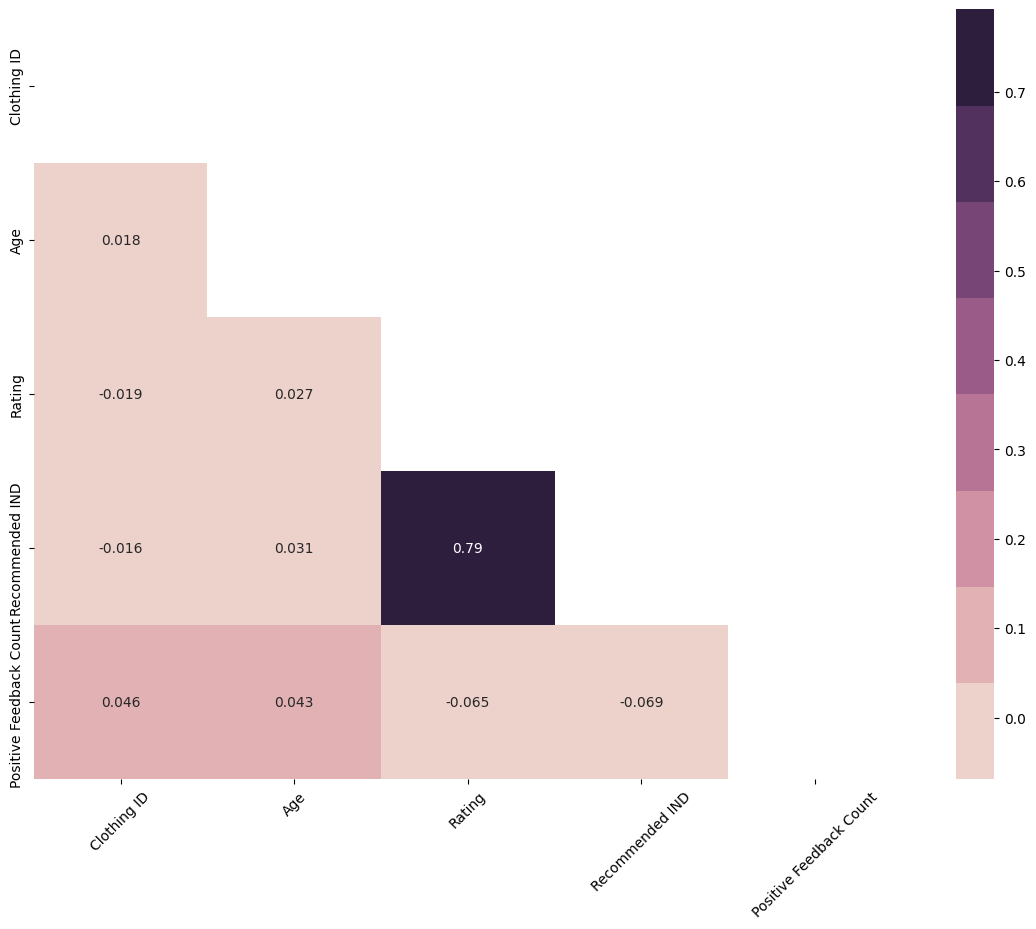

In [16]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

In [17]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

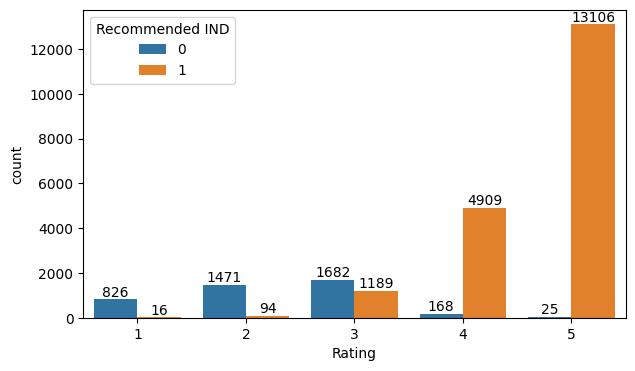

In [18]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [19]:
df["Recommended IND"].unique()

array([1, 0])

In [20]:
len(df)

23486

In [21]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [22]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [23]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

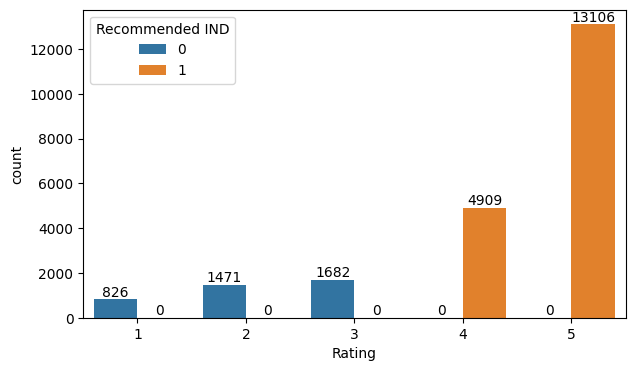

In [24]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)
  #  visualizing the number of comments .

- The Examination of Other Features

"rating" is a Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.



In [25]:
df["Rating"].value_counts()


5    13106
4     4909
3     1682
2     1471
1      826
Name: Rating, dtype: int64

In [26]:
df["Rating"].describe().T


count    21994.000000
mean         4.272984
std          1.097009
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

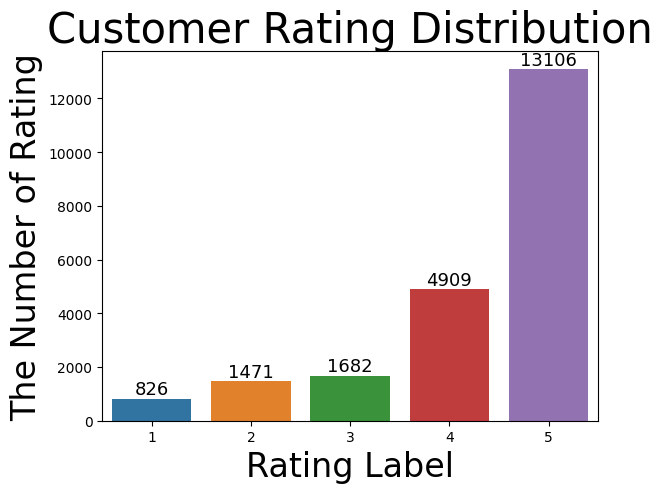

In [27]:
sns.countplot(x = df.Rating, data = df)
plt.title('Customer Rating Distribution', fontsize=30)
plt.xlabel("Rating Label", fontsize=24)
plt.ylabel("The Number of Rating", fontsize=24)

for index,value in enumerate(df.Rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

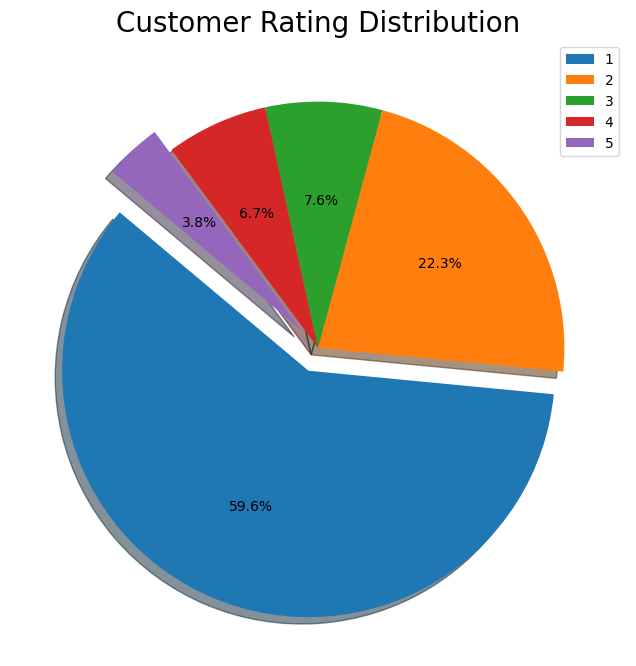

In [28]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['Rating'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');

In [29]:
df["Age"].value_counts()


39    1189
35     858
36     789
34     729
37     725
      ... 
90       2
86       2
99       2
93       2
92       1
Name: Age, Length: 77, dtype: int64

In [30]:
df["Age"].describe().T

count    21994.000000
mean        43.216013
std         12.285411
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

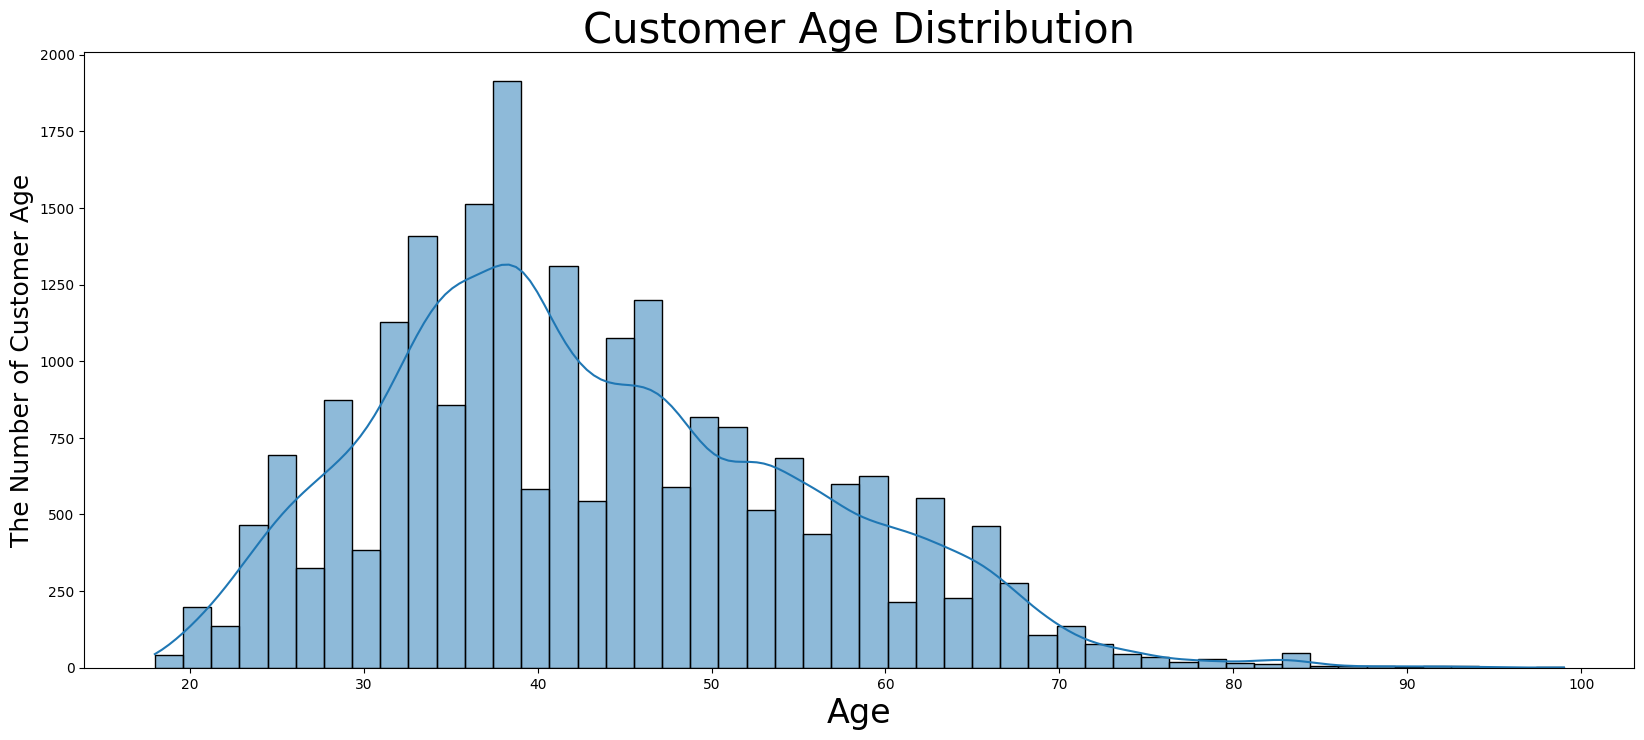

In [31]:
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)

sns.histplot(df, x='Age', kde = True, bins = 50);

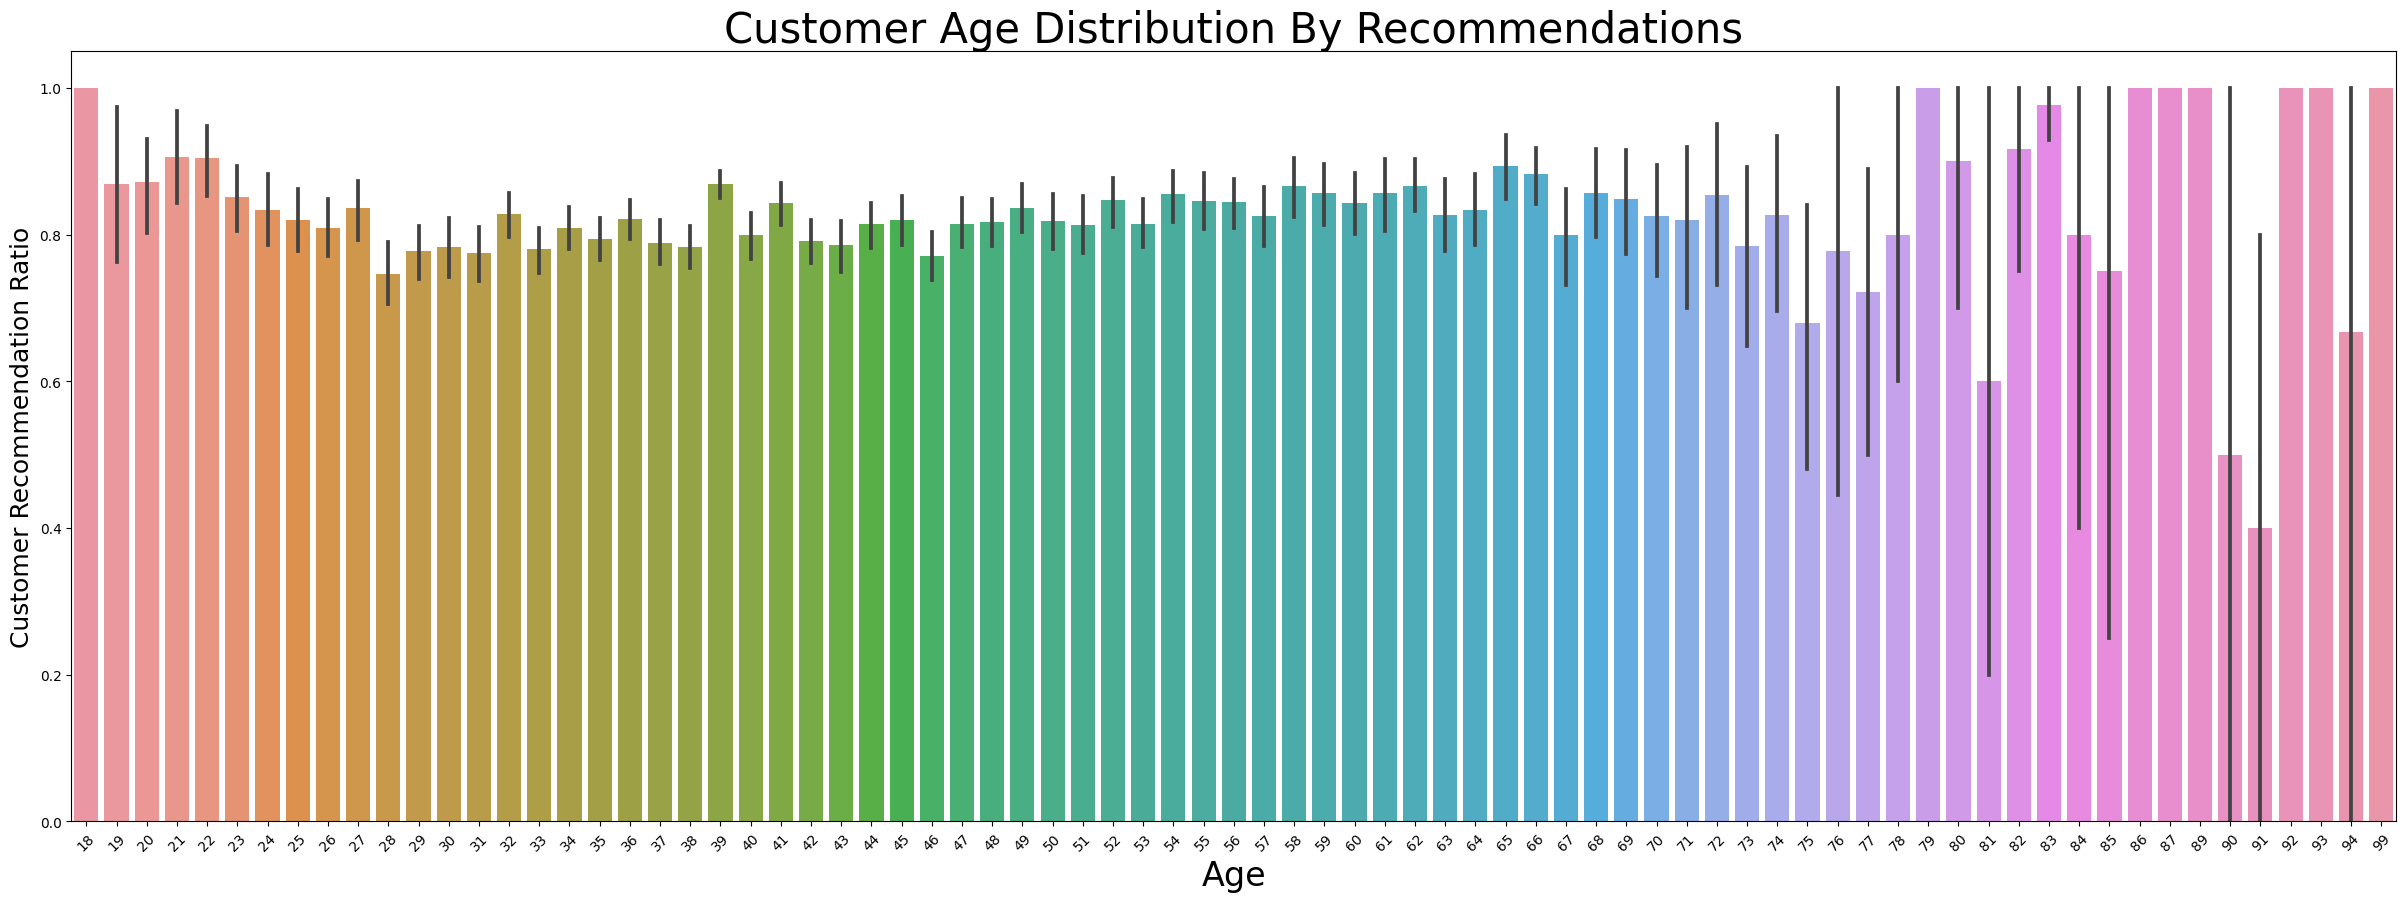

In [32]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df, x = "Age", y = "Recommended IND", ax=ax)

plt.title('Customer Age Distribution By Recommendations', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("Customer Recommendation Ratio", fontsize=18)
plt.xticks(rotation = 45);

In [33]:
import plotly.express as px
fig = px.histogram(df['Age'], color=df['Recommended IND'],
                   labels={'value': 'Age', 'color': 'Recommended'},
                   color_discrete_map={0: "magenta", 1: "MediumPurple"},
                   marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

In [34]:
df0

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

In [35]:
df["Positive Feedback Count"].value_counts()


0     10519
1      3785
2      2043
3      1344
4       870
      ...  
94        1
77        1
82        1
66        1
59        1
Name: Positive Feedback Count, Length: 81, dtype: int64

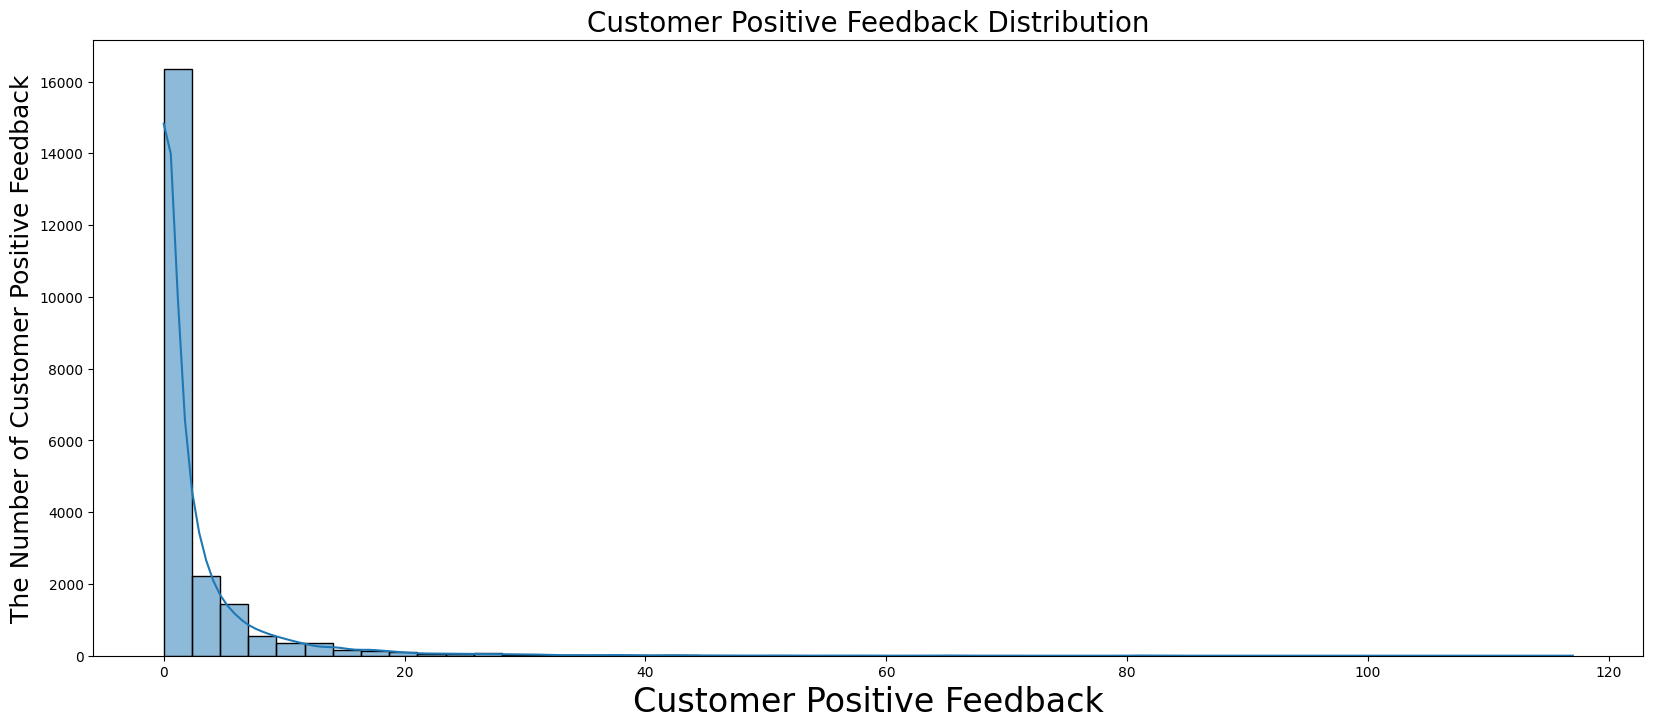

In [36]:
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)

sns.histplot(df, x='Positive Feedback Count', kde = True, bins = 50);

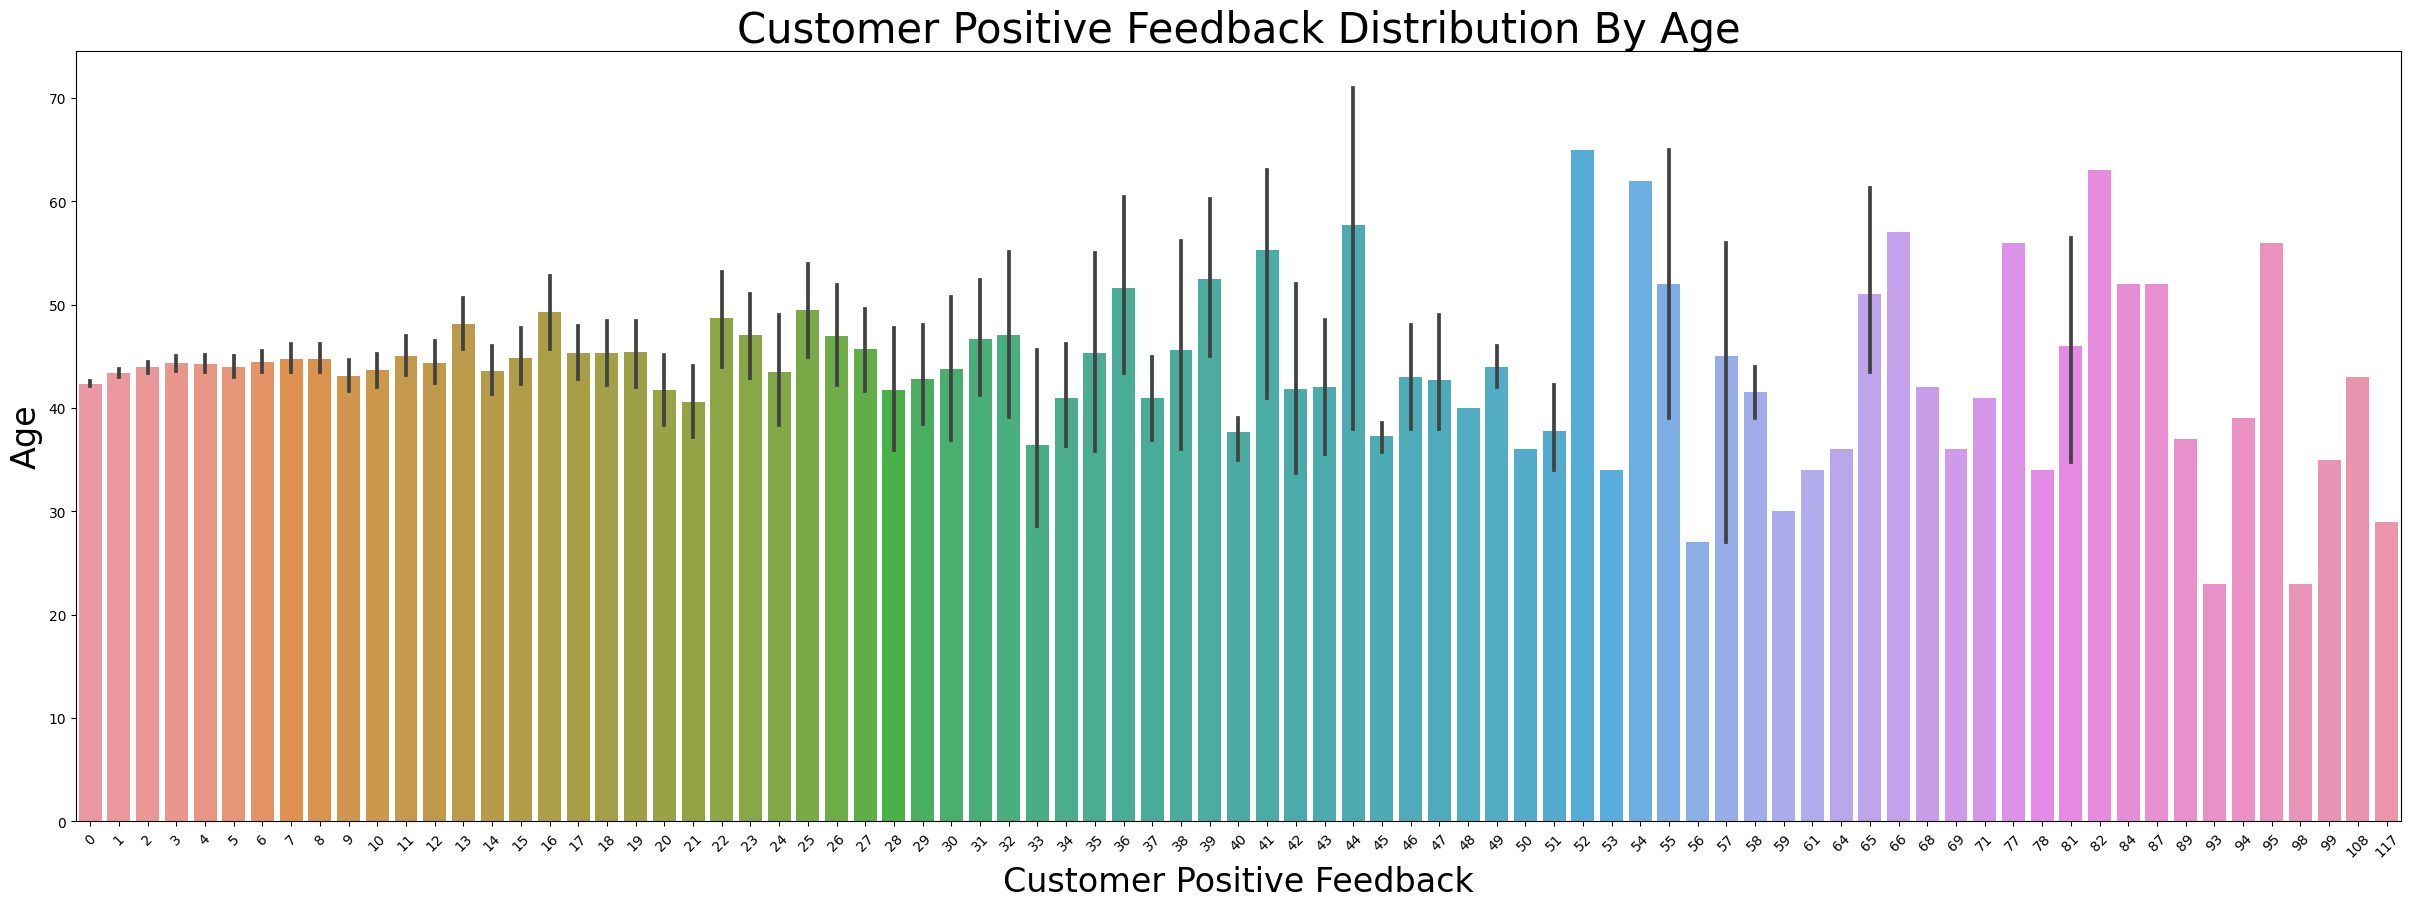

In [37]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df, x = "Positive Feedback Count", y = "Age", ax=ax)

plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("Age", fontsize=24)

plt.title('Customer Positive Feedback Distribution By Age', fontsize=30)
plt.xticks(rotation = 45);

In [38]:
df["Division Name"].value_counts()


General           12923
General Petite     7635
Initmates          1422
Name: Division Name, dtype: int64

In [39]:
df["Division Name"].describe().T

count       21980
unique          3
top       General
freq        12923
Name: Division Name, dtype: object

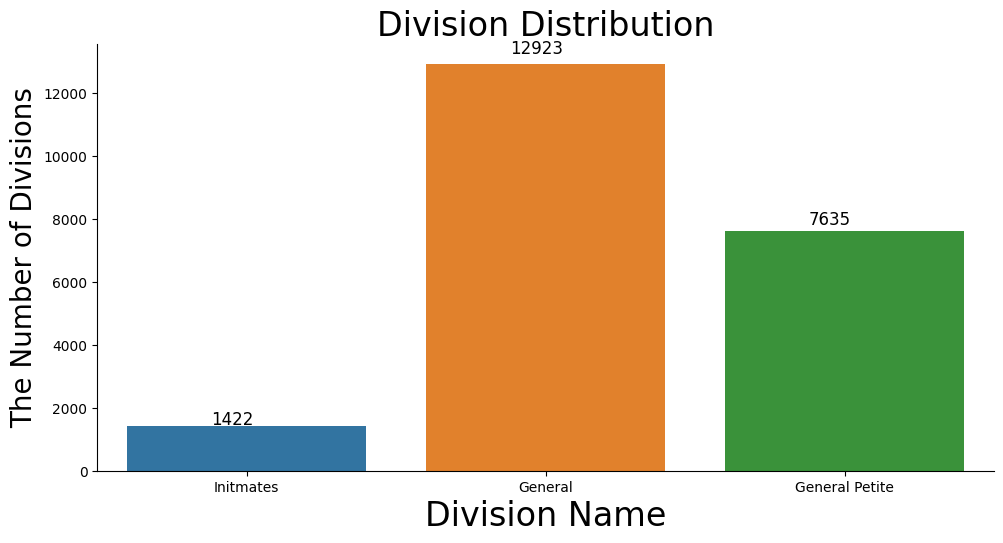

In [40]:
g = sns.catplot( x='Division Name',
             kind="count",
             data=df,
             height=5,
             aspect=2)

plt.title('Division Distribution', fontsize=24)
plt.xlabel("Division Name", fontsize=24)
plt.ylabel("The Number of Divisions", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

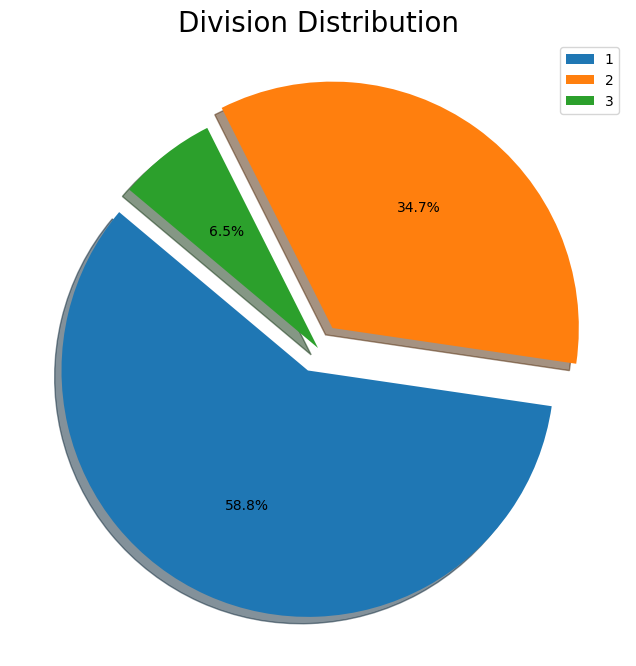

In [41]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0.1, 0]
plt.pie(df['Division Name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3'])
plt.title('Division Distribution', fontsize=20)
plt.axis('off');

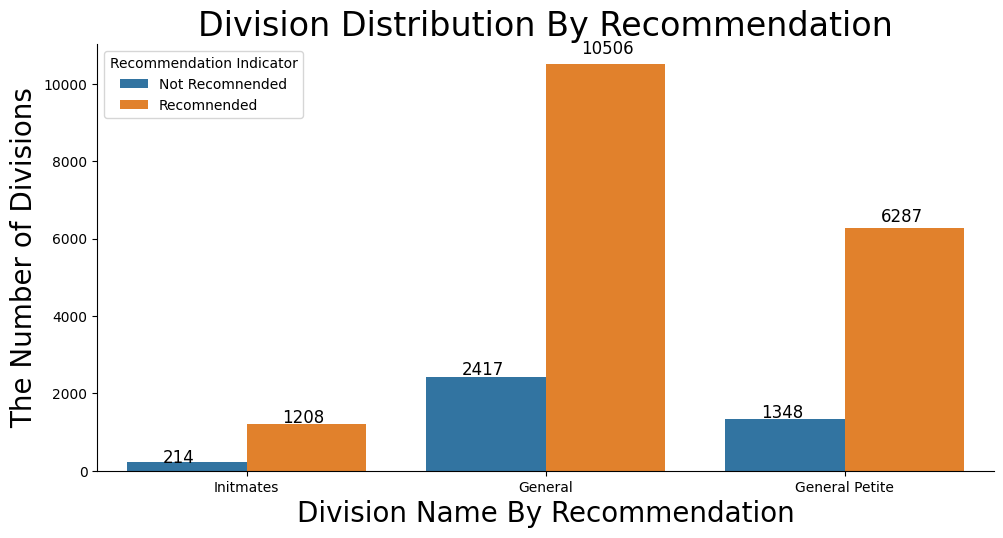

In [44]:
g = sns.catplot(data = df, x ="Division Name", hue = "Recommended IND", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Division Distribution By Recommendation', fontsize=24)
plt.xlabel("Division Name By Recommendation", fontsize=20)
plt.ylabel("The Number of Divisions", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'])

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

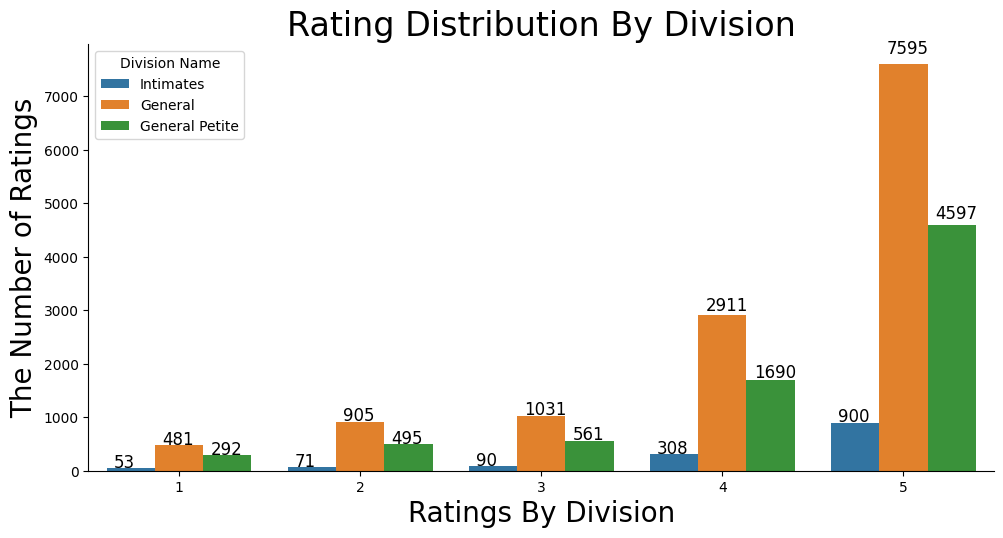

In [45]:
g = sns.catplot(data = df, x ="Rating", hue = "Division Name", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Rating Distribution By Division', fontsize=24)
plt.xlabel("Ratings By Division", fontsize=20)
plt.ylabel("The Number of Ratings", fontsize=20)
plt.legend(title='Division Name', loc='upper left', labels=['Intimates', 'General', 'General Petite'])

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.04,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

In [46]:
df["Department Name"].value_counts()


Tops        9831
Dresses     5856
Bottoms     3563
Intimate    1644
Jackets      979
Trend        107
Name: Department Name, dtype: int64

In [47]:
df["Department Name"].describe().T


count     21980
unique        6
top        Tops
freq       9831
Name: Department Name, dtype: object

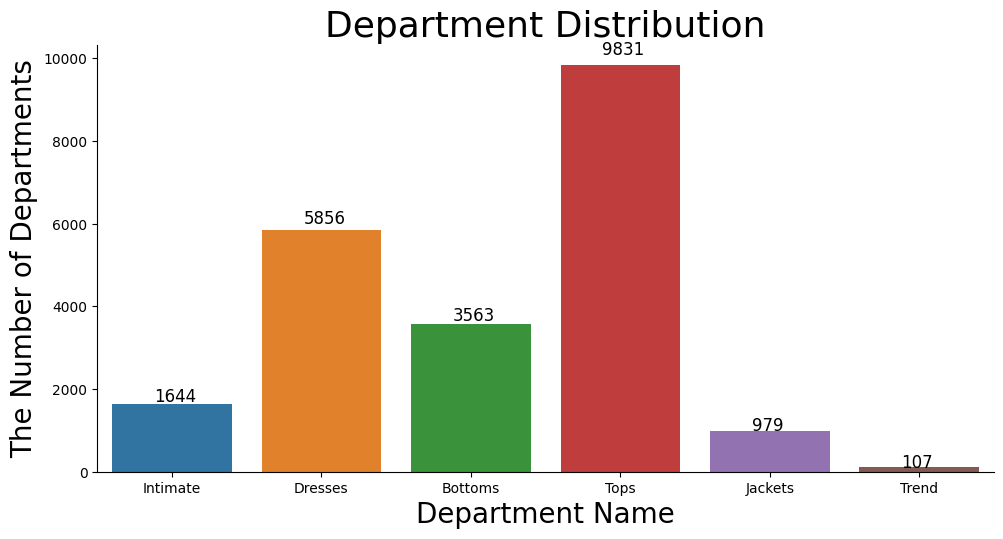

In [48]:
g = sns.catplot(data = df, x ="Department Name", kind='count', height=5, aspect=2)

plt.title('Department Distribution', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Departments", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

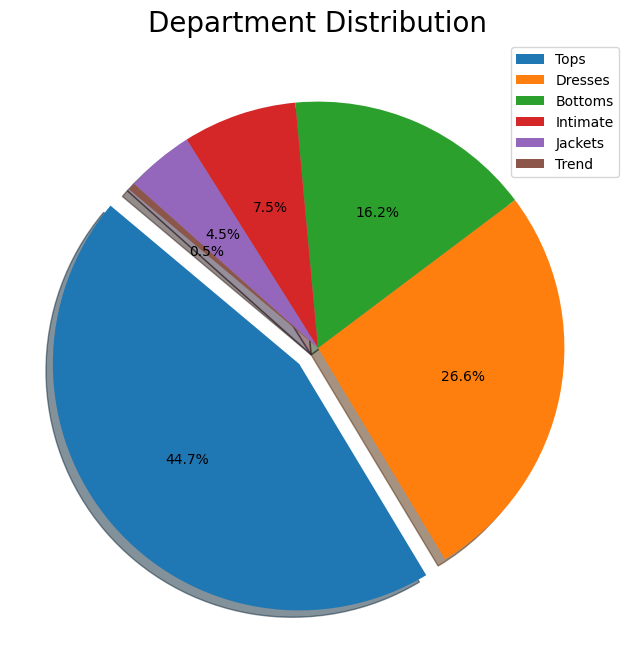

In [52]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(df['Department Name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Tops', 'Dresses', 'Bottoms', 'Intimate', 'Jackets', 'Trend'])
plt.title('Department Distribution', fontsize=20)
plt.axis('off');

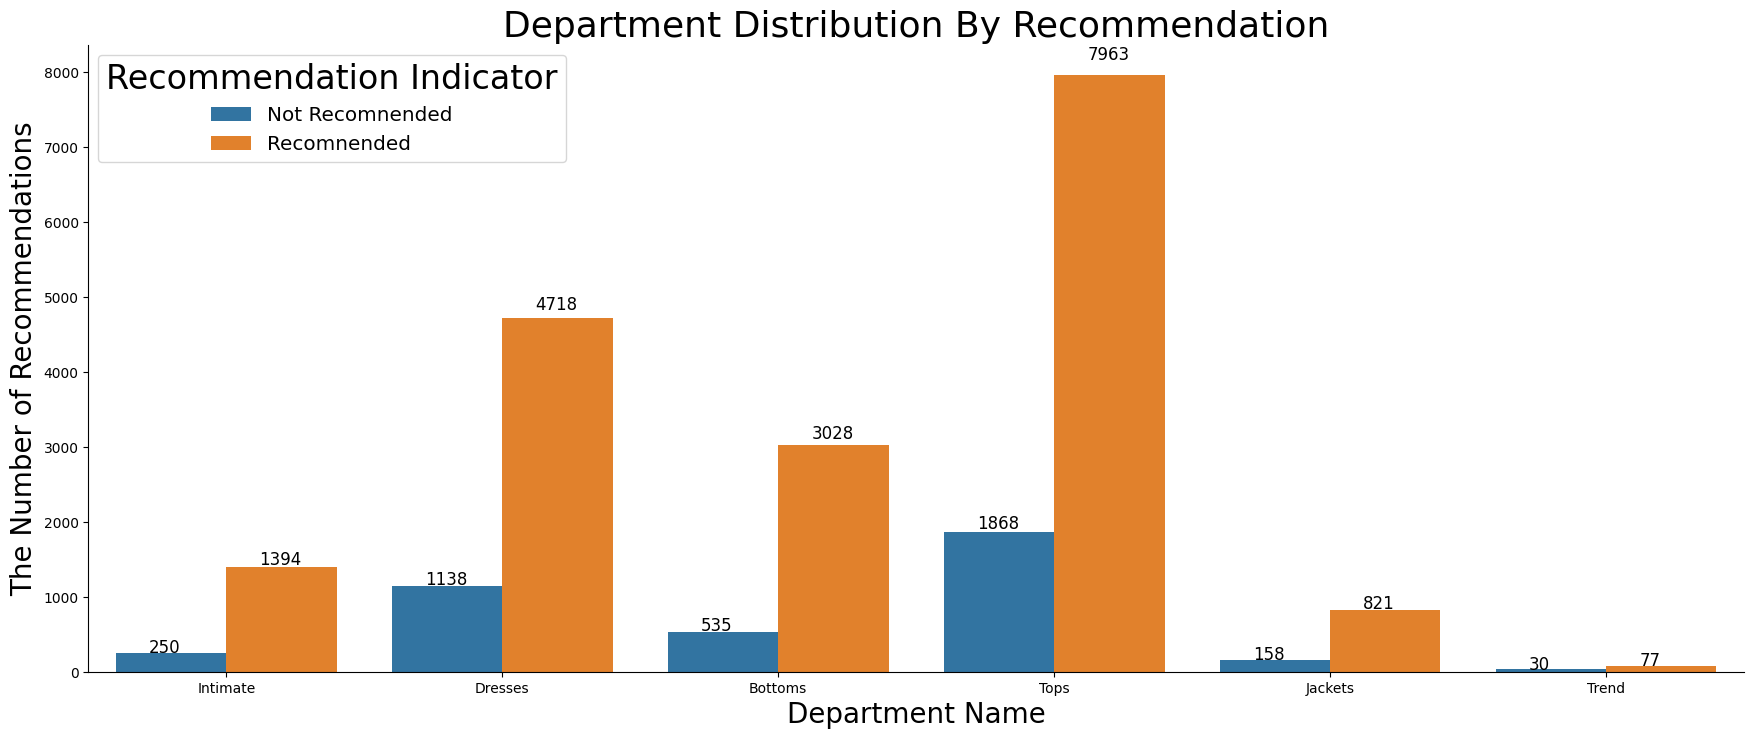

In [53]:
g = sns.catplot(data = df, x ="Department Name", hue = "Recommended IND", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

<Figure size 1500x800 with 0 Axes>

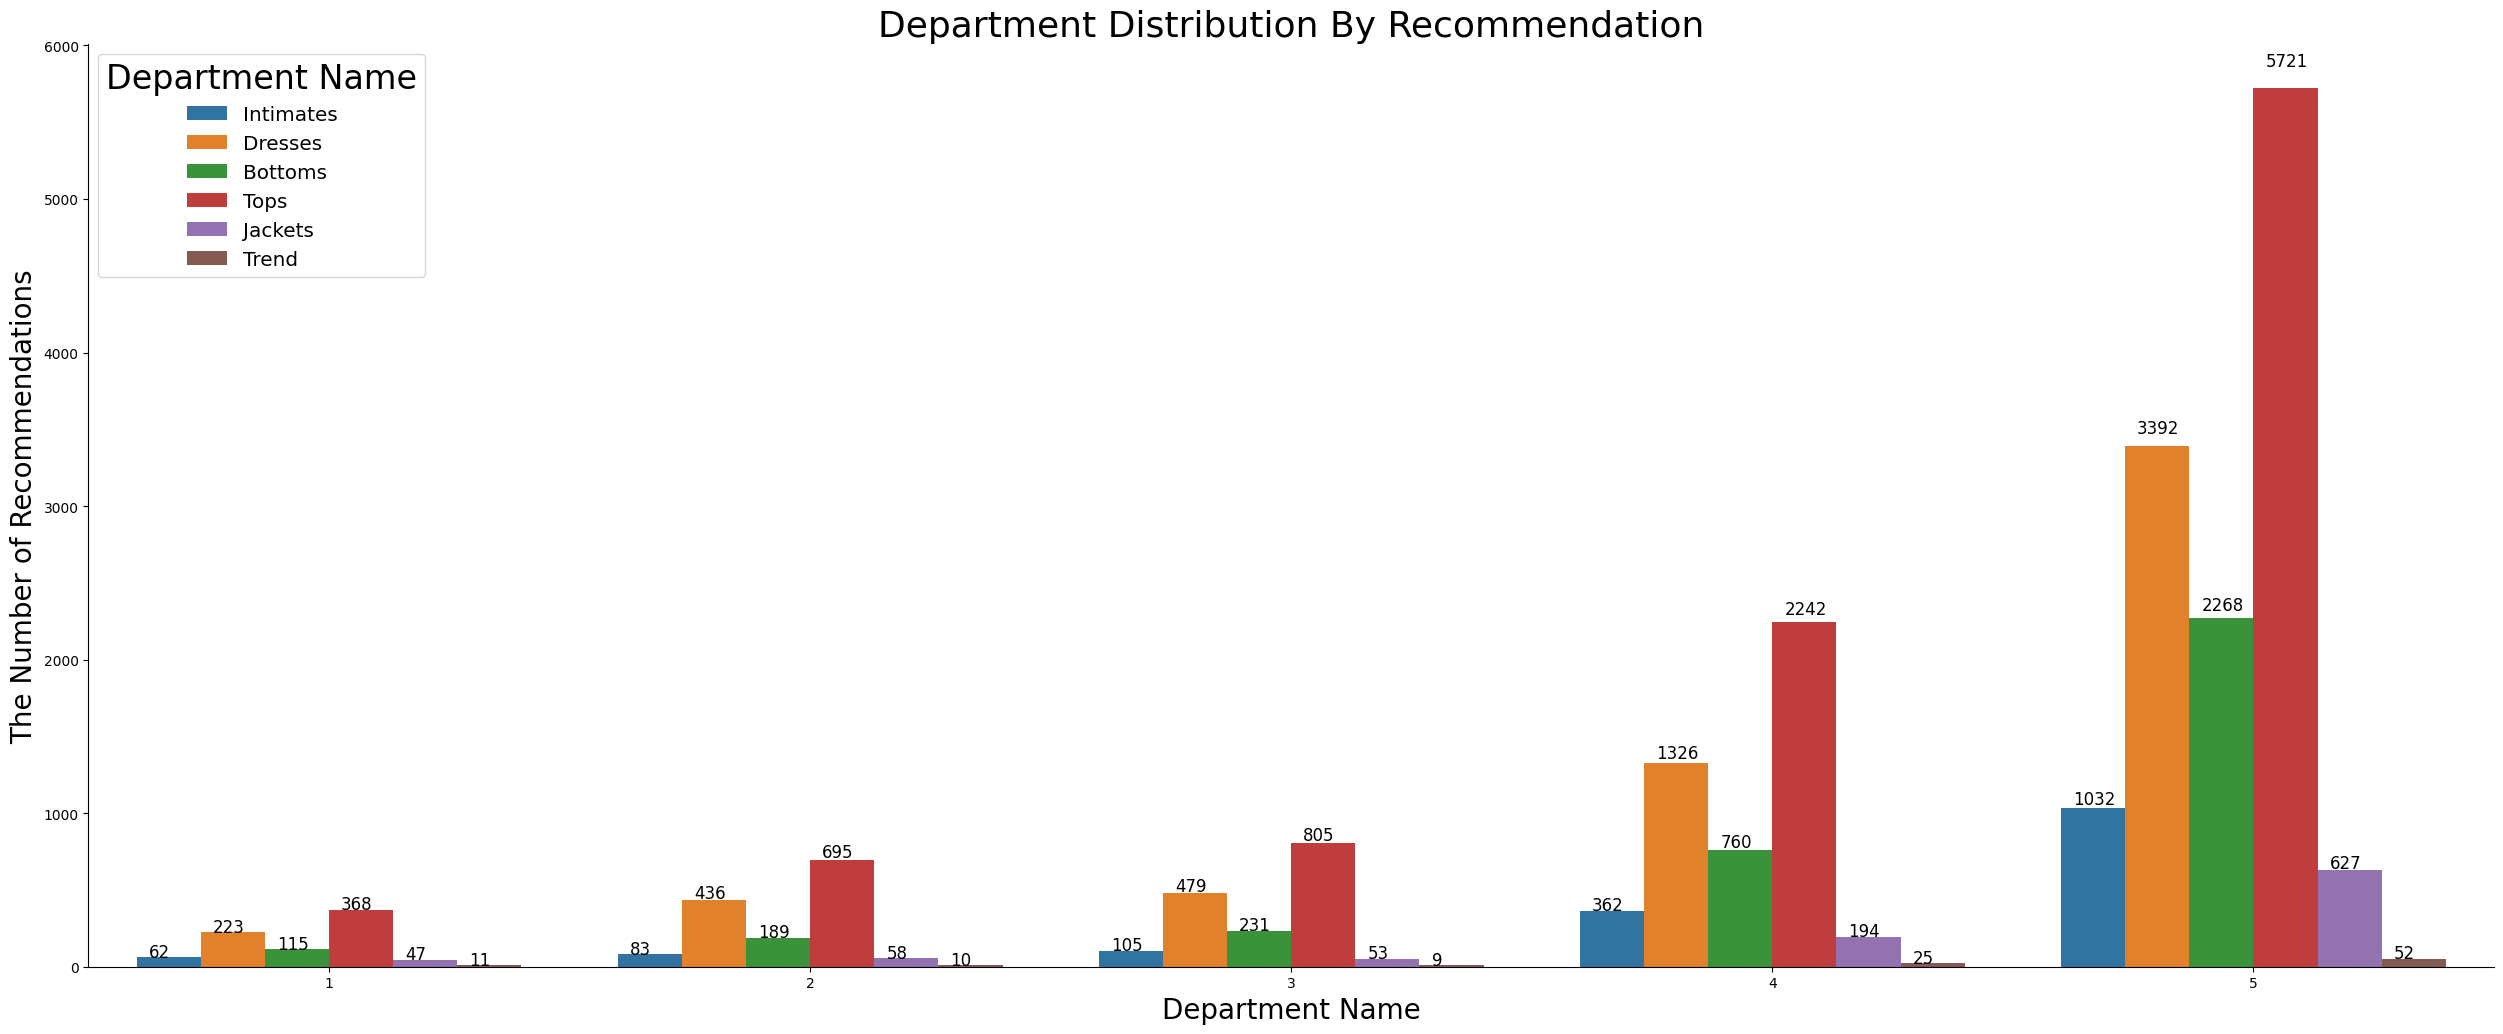

In [54]:
g = sns.catplot(data = df, x ="Rating", hue = "Department Name", kind='count', height=10, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Department Name', loc='upper left', labels=['Intimates', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'], fontsize='x-large', title_fontsize='24')
plt.figure(figsize=(15, 8))

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

In [55]:
df["Class Name"].value_counts()


Dresses           5856
Knits             4540
Blouses           2899
Sweaters          1347
Pants             1305
Jeans             1075
Fine gauge        1045
Skirts             884
Jackets            672
Lounge             656
Swim               334
Outerwear          307
Shorts             297
Sleep              215
Legwear            154
Intimates          145
Layering           139
Trend              107
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [56]:
df["Class Name"].describe().T


count       21980
unique         20
top       Dresses
freq         5856
Name: Class Name, dtype: object

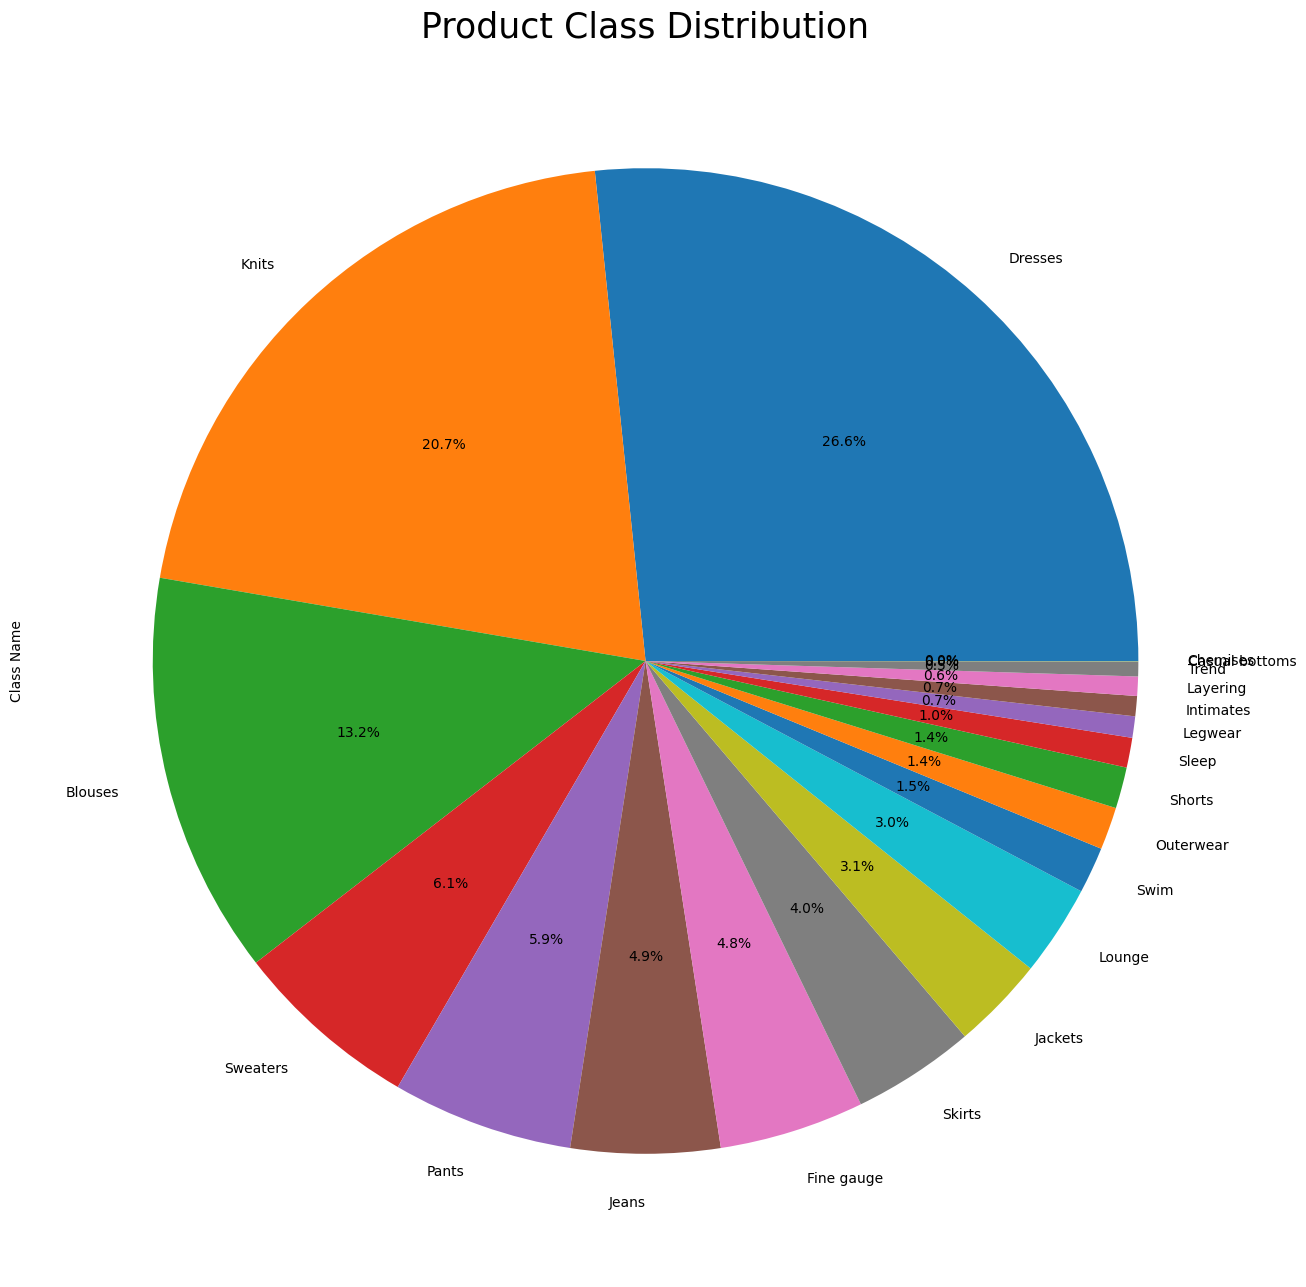

In [57]:
plt.title('Product Class Distribution', fontsize=25)
df["Class Name"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(16, 16));

In [66]:
FreqOfWords = df['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

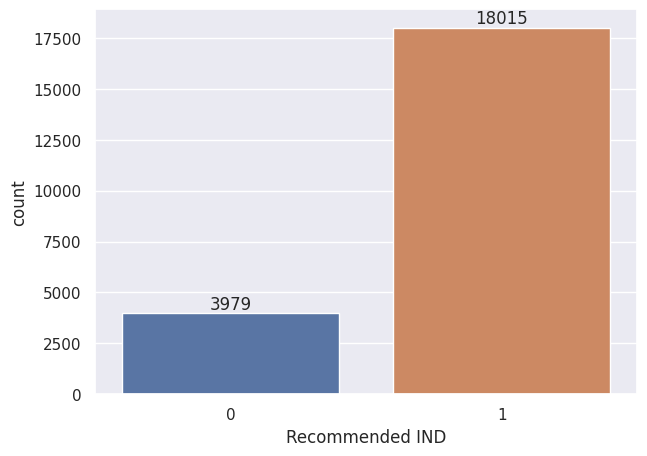

In [67]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended IND",
                   data=df)
ax.bar_label(ax.containers[0]);
# We are visualizing the number of the classes.

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [68]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"},
          inplace=True)

In [69]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                text  Rating  label  \
0  Absolutely wonderful - silky and sexy and comf...       4      1   
1  Love this dress!  it's sooo pretty.  i happene...       5      1   
2  I had such high hopes for this dress and reall...       3      0   
3  I love, love, love this jumpsuit. it's fun, fl...       5      1   
4  This shirt is very flattering to all due to th...       5      1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [70]:
df=df[['text','label']]
df.head()

text  label
0  Absolutely wonderful - silky and sexy and comf...      1
1  Love this dress!  it's sooo pretty.  i happene...      1
2  I had such high hopes for this dress and reall...      0
3  I love, love, love this jumpsuit. it's fun, fl...      1
4  This shirt is very flattering to all due to th...      1

---
---


### Missing Value Detection

In [71]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [72]:
df.dropna(inplace = True)
df.reset_index(drop=True,
               inplace=True)
df

text  label
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
21170  I was surprised at the positive reviews for th...      0
21171  So i wasn't sure about ordering this skirt bec...      1
21172  I was very happy to snag this dress at such a ...      1
21173  This fit well, but the top was very see throug...      0
21174  This dress in a lovely platinum is feminine an...      1

[21175 rows x 2 columns]

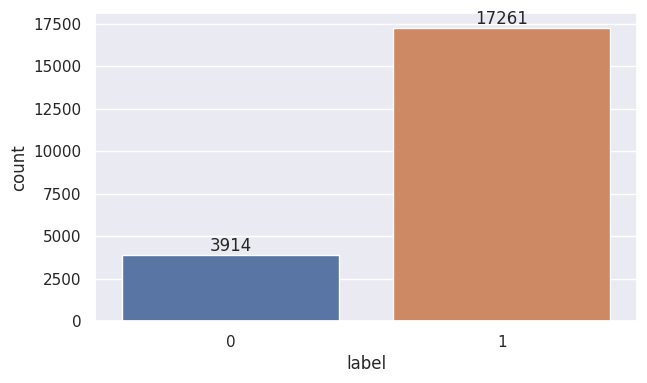

In [73]:
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="label",
                   data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [74]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [75]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [76]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [77]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [78]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [79]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [80]:
from wordcloud import WordCloud

In [81]:
wordcloud_positive = WordCloud(background_color="black",
                               max_words =250,
                               scale=3)

In [82]:
wordcloud_positive.generate(positive_words)

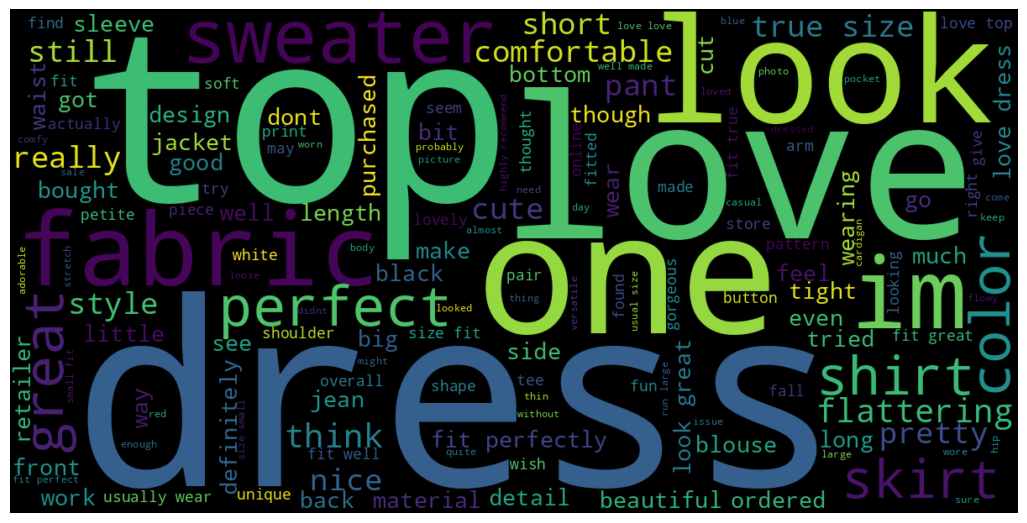

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

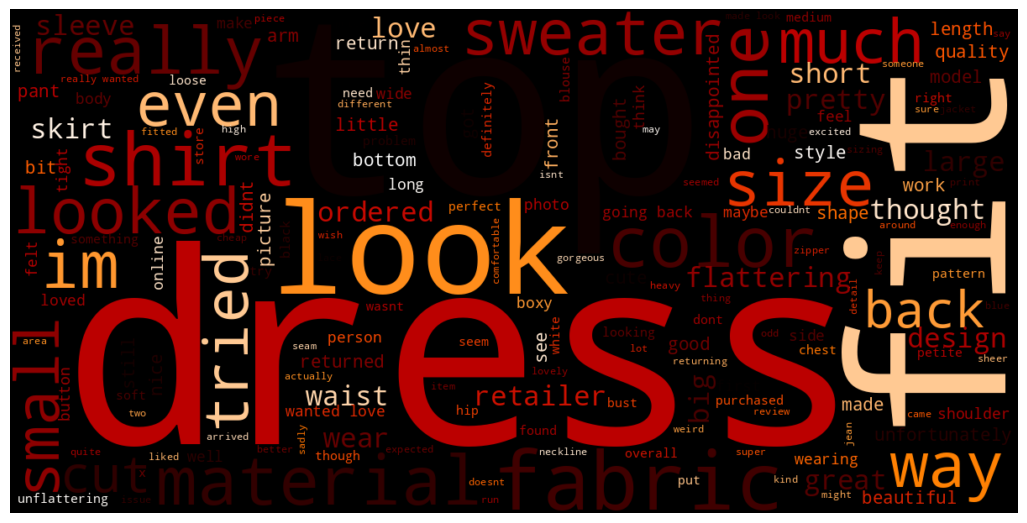

In [84]:
wordcloud_negative = WordCloud(background_color="black",
                               max_words=250,
                               colormap='gist_heat',
                               scale=3)

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
vectorizer = CountVectorizer(preprocessor=cleaning,
                             min_df=3,
                             max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [90]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           0   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
19052   0   0     0        0        0     0    0         0           0   
19053   0   0     0        0        0     0    0         0           0   
19054   0   0     0        0        0     0    0         0           0   
19055   0   0     0        0        0     0    0         0           0   
19056   0   0     0        0        0     0    0         0           0   

       absolutley  ...  yucky  yummy  zero  zip  zipped  zipper  zippered  \
0               0  ...      0      0     0    0       0       0         0   
1               0  ...      0      0     0    0       0       0         0   
2               0  ...      0      0     0    0       0       0         0   
3               0  ...      0      0     0    0       0       0         0   
4               0  ...      0      0     0    0       0       0         0   
...           ...  ...    ...    ...   ...  ...     ...     ...       ...   
19052           0  ...      0      0     0    0       0       0         0   
19053           0  ...      0      0     0    0       0       0         0   
19054           0  ...      0      0     0    0       0       0         0   
19055           0  ...      0      0     0    0       0       0         0   
19056           0  ...      0      0     0    0       0       0         0   

       zipping  zone  zoom  
0            0     0     0  
1            0     0     0  
2            0     0     0  
3            0     0     0  
4            0     0     0  
...        ...   ...   ...  
19052        0     0     0  
19053        0     0     0  
19054        0     0     0  
19055        0     0     0  
19056        0     0     0  

[19057 rows x 5005 columns]

### TF-IDF

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                                    min_df=3,
                                    max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [94]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns = tf_idf_vectorizer.get_feature_names_out())

aa   ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
...    ...  ...   ...      ...      ...   ...  ...       ...         ...   
19052  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
19053  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
19054  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
19055  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
19056  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   

       absolutley  ...  yucky  yummy  zero  zip  zipped  zipper  zippered  \
0             0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
1             0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
2             0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
3             0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
4             0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
...           ...  ...    ...    ...   ...  ...     ...     ...       ...   
19052         0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
19053         0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
19054         0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
19055         0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   
19056         0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0       0.0   

       zipping  zone  zoom  
0          0.0   0.0   0.0  
1          0.0   0.0   0.0  
2          0.0   0.0   0.0  
3          0.0   0.0   0.0  
4          0.0   0.0   0.0  
...        ...   ...   ...  
19052      0.0   0.0   0.0  
19053      0.0   0.0   0.0  
19054      0.0   0.0   0.0  
19055      0.0   0.0   0.0  
19056      0.0   0.0   0.0  

[19057 rows x 5005 columns]

## Eval functions

In [96]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [97]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [98]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [99]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1484  243]
 [  52  339]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.87      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.90      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.63      0.90      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [100]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.873906
train_accuracy     0.884131
test_f1            0.719061
train_f1           0.741943
test_recall        0.872542
train_recall       0.901000
test_precision     0.611845
train_precision    0.630623
dtype: float64

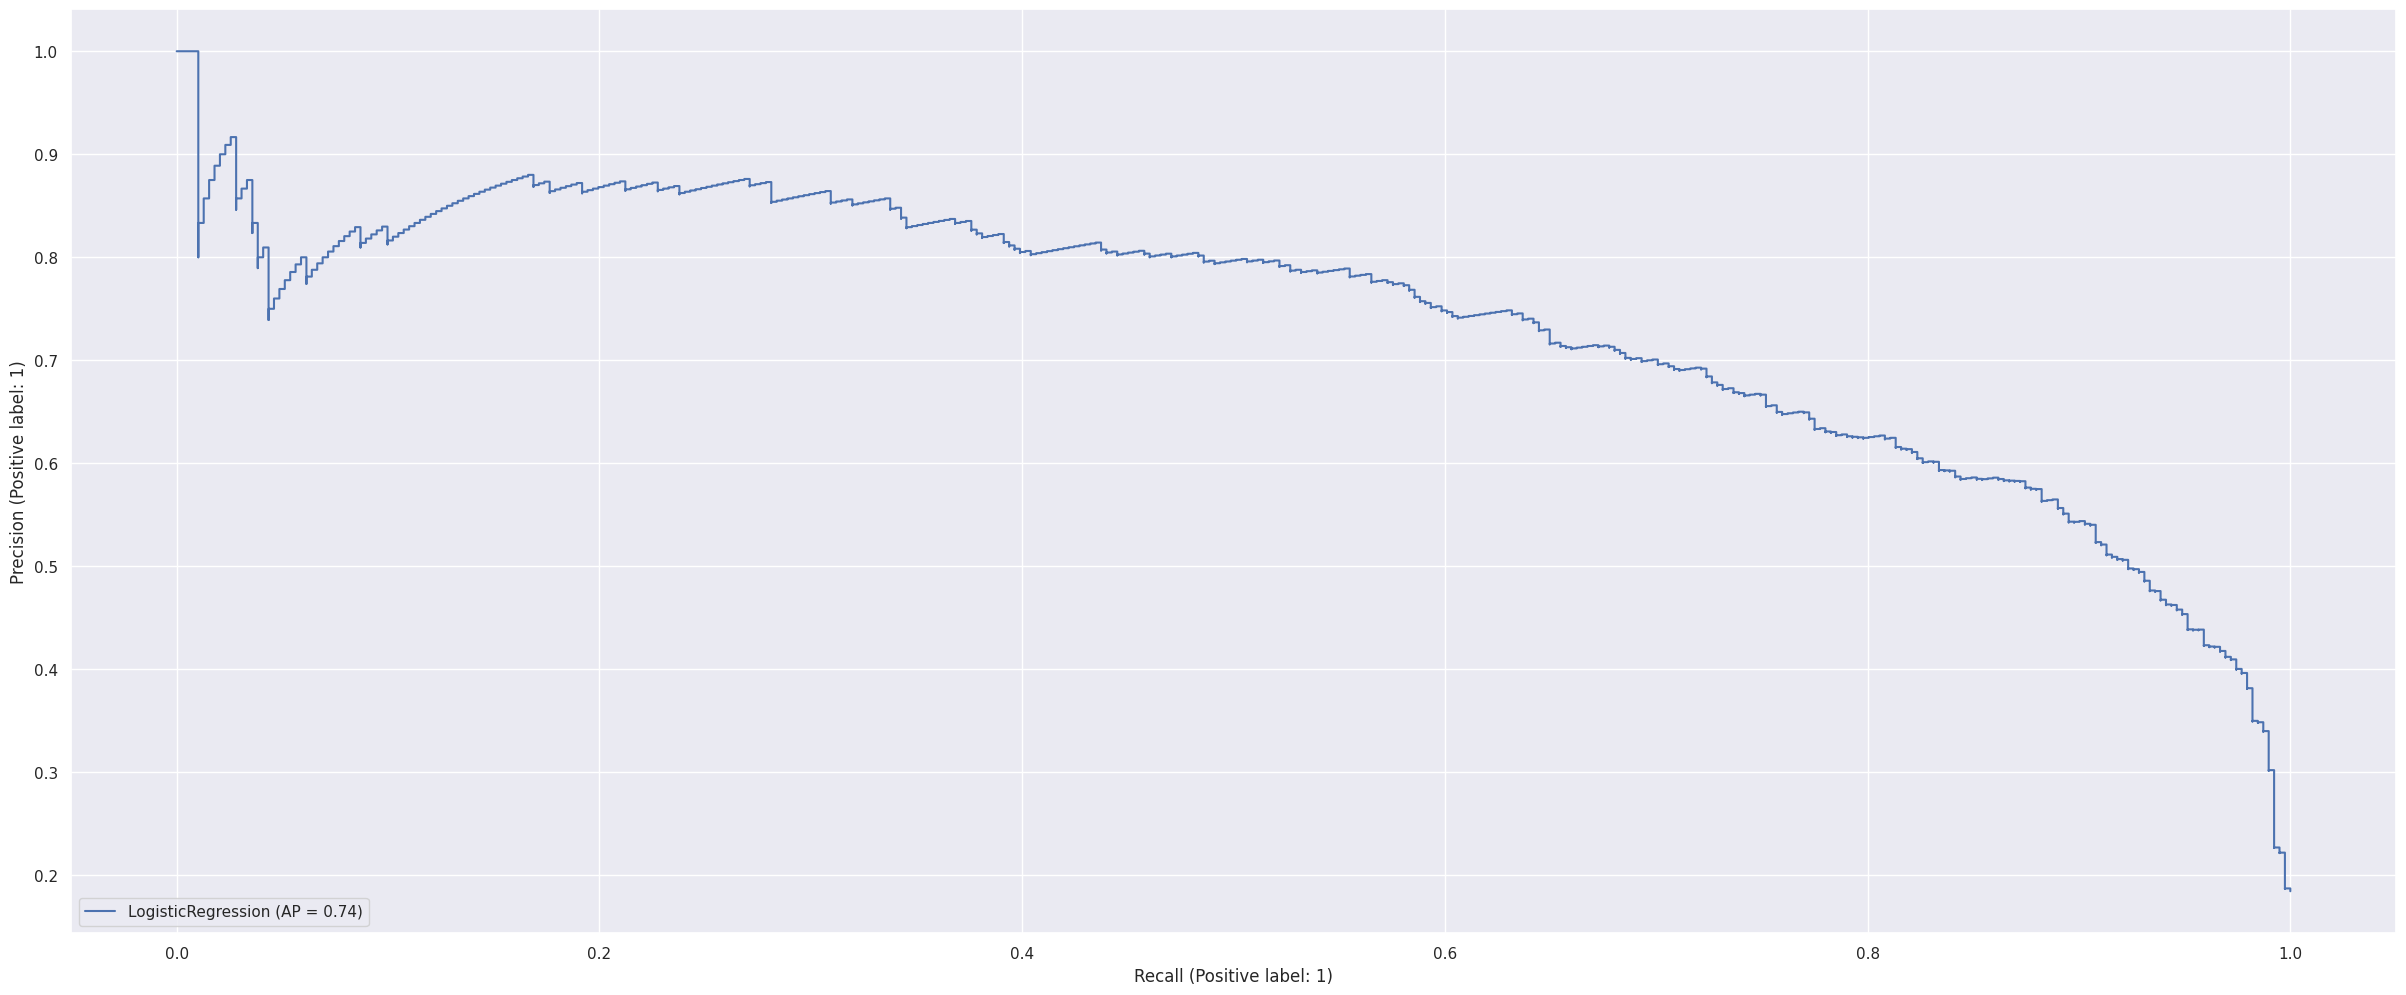

In [101]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log,
                                      X_test_count,
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred);

In [102]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [103]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [104]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1464  263]
 [  49  342]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1727
           1       0.57      0.87      0.69       391

    accuracy                           0.85      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.85      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15534
           1       0.61      0.90      0.73      3523

    accuracy                           0.88     19057
   macro avg       0.79      0.89      0.82     19057
weighted avg       0.91      0.88      0.88     19057



In [105]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.867084
train_accuracy     0.875158
test_f1            0.710168
train_f1           0.728379
test_recall        0.880782
train_recall       0.905447
test_precision     0.595173
train_precision    0.609239
dtype: float64

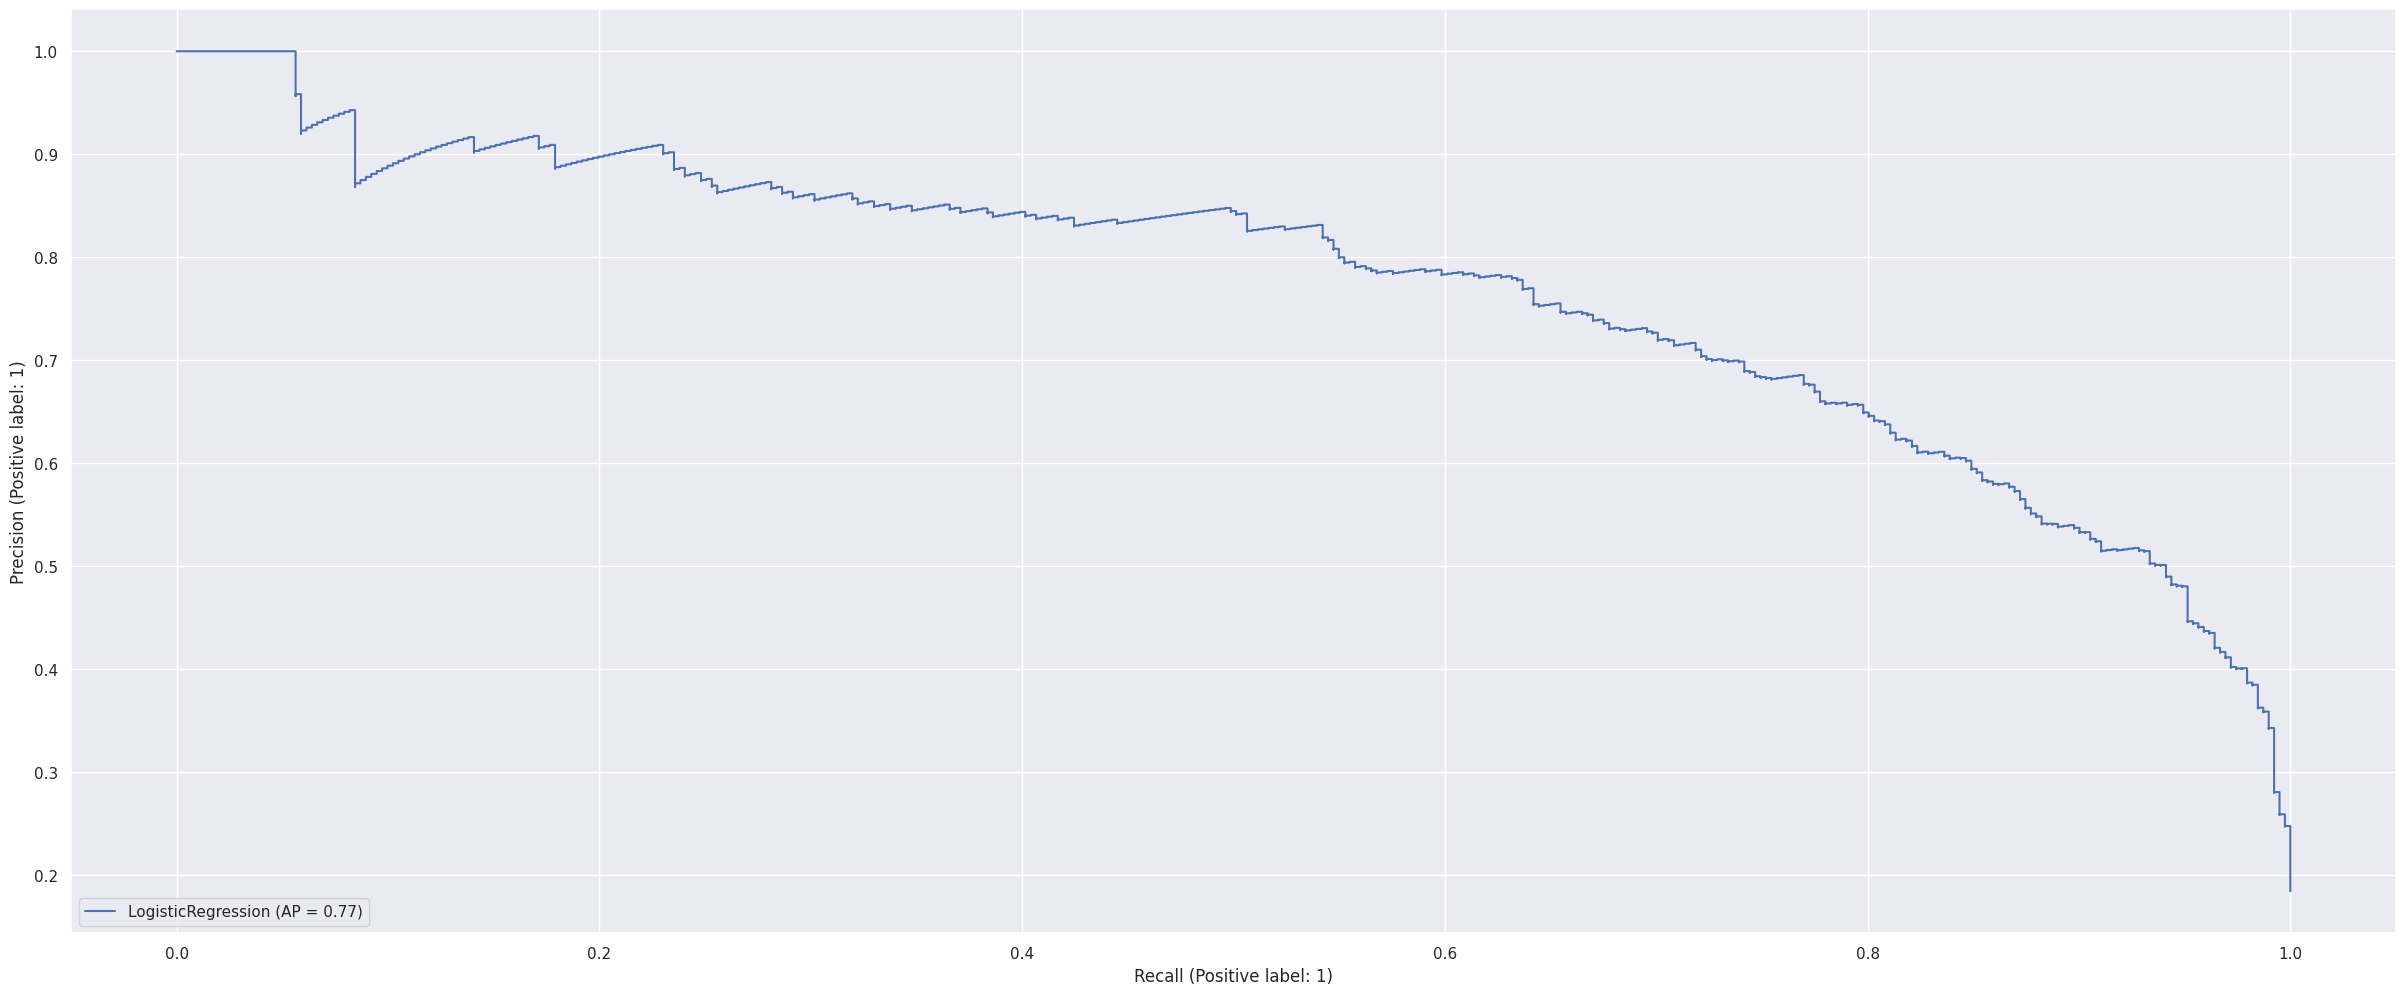

In [106]:
PrecisionRecallDisplay.from_estimator(log,
                                      X_test_tf_idf,
                                      y_test);

In [107]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [108]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [109]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1609  118]
 [  78  313]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.73      0.80      0.76       391

    accuracy                           0.91      2118
   macro avg       0.84      0.87      0.85      2118
weighted avg       0.91      0.91      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.76      0.84      0.80      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.93      0.92      0.92     19057



In [110]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.906439
train_accuracy     0.922577
test_f1            0.757743
train_f1           0.799851
test_recall        0.791652
train_recall       0.836818
test_precision     0.726964
train_precision    0.766018
dtype: float64

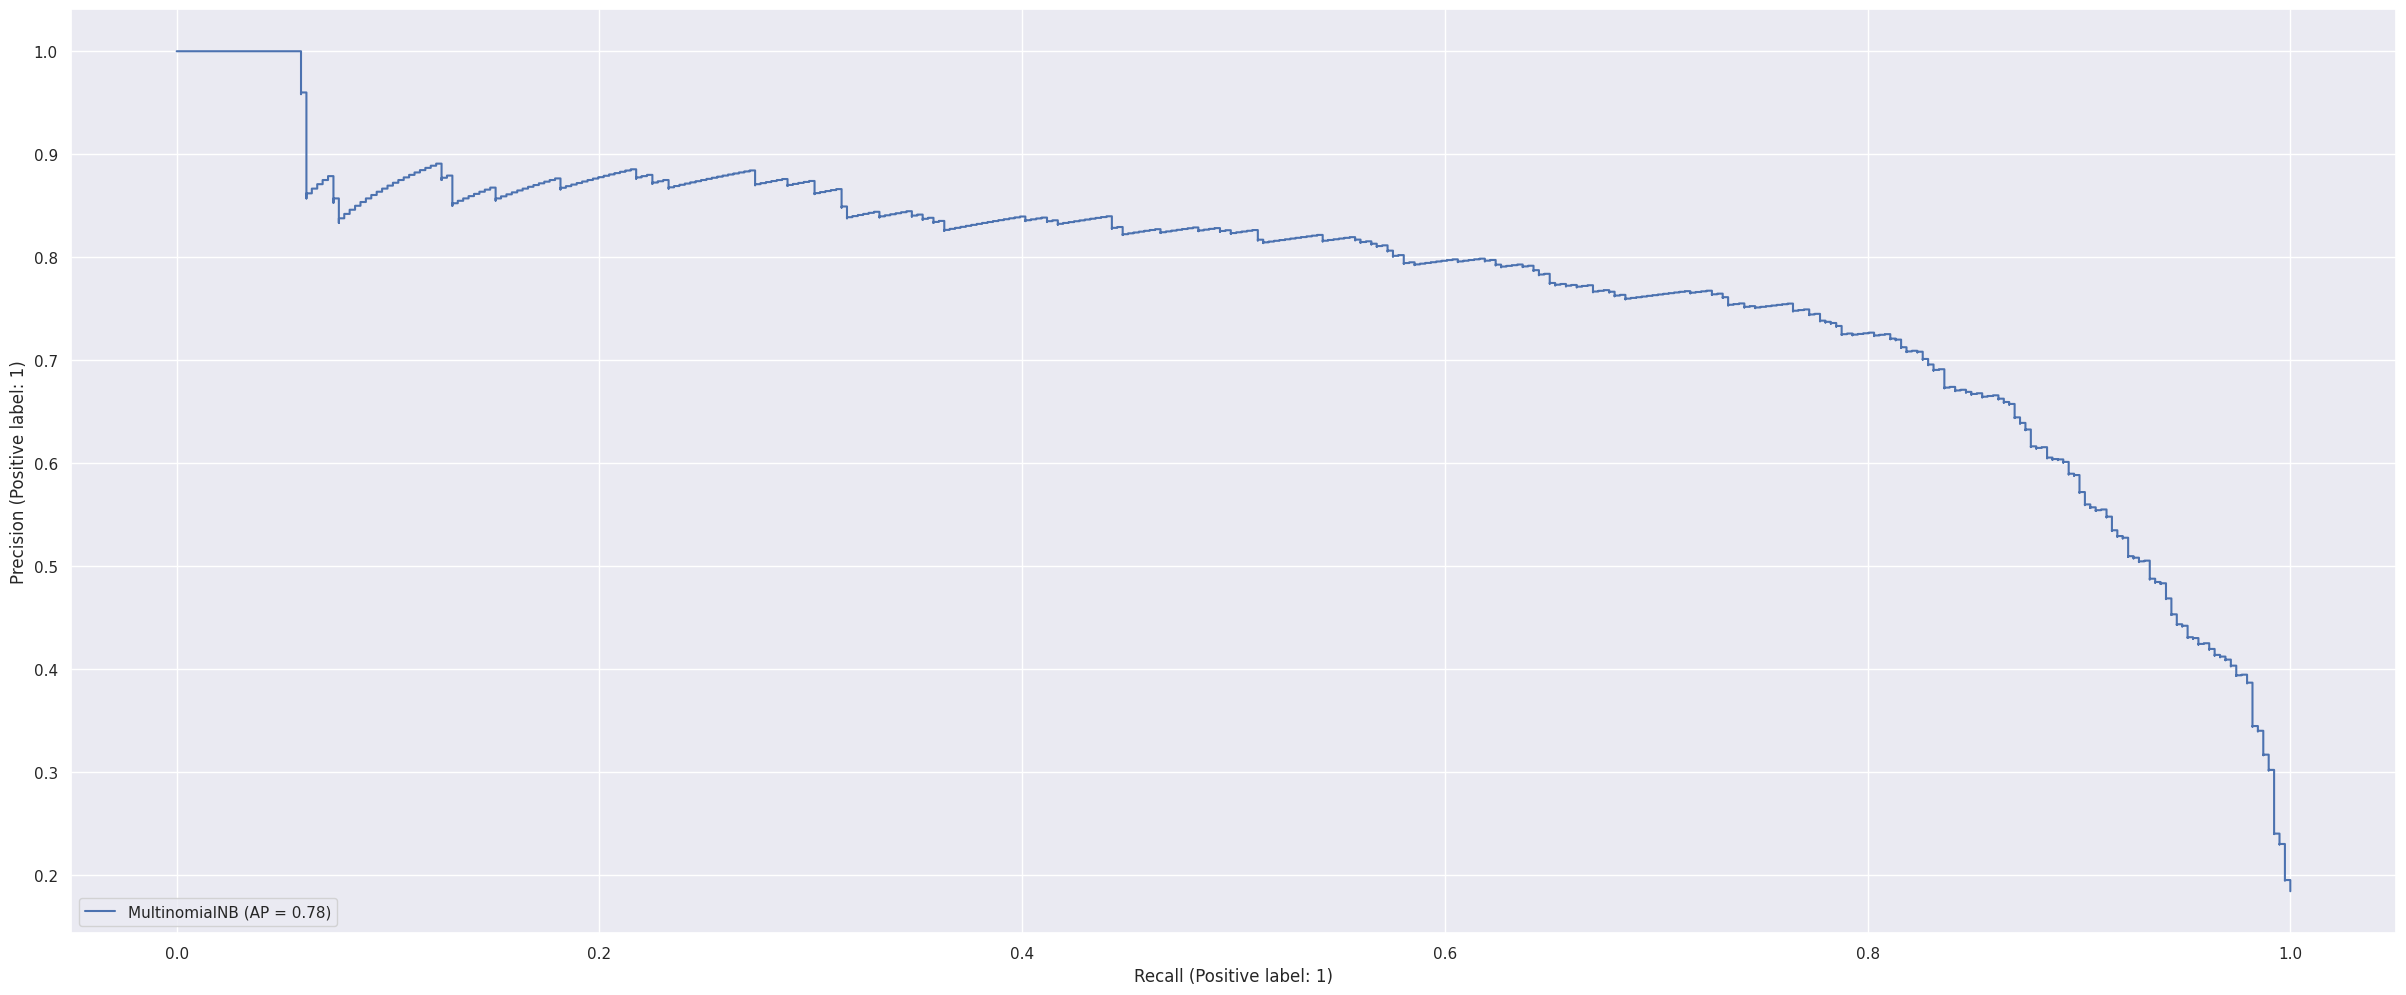

In [111]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_count,
                                      y_test);

In [112]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [113]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [114]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1599  128]
 [  77  314]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1727
           1       0.71      0.80      0.75       391

    accuracy                           0.90      2118
   macro avg       0.83      0.86      0.85      2118
weighted avg       0.91      0.90      0.91      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.75      0.84      0.79      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [115]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.900876
train_accuracy     0.918933
test_f1            0.746102
train_f1           0.792657
test_recall        0.787679
train_recall       0.838206
test_precision     0.708829
train_precision    0.751806
dtype: float64

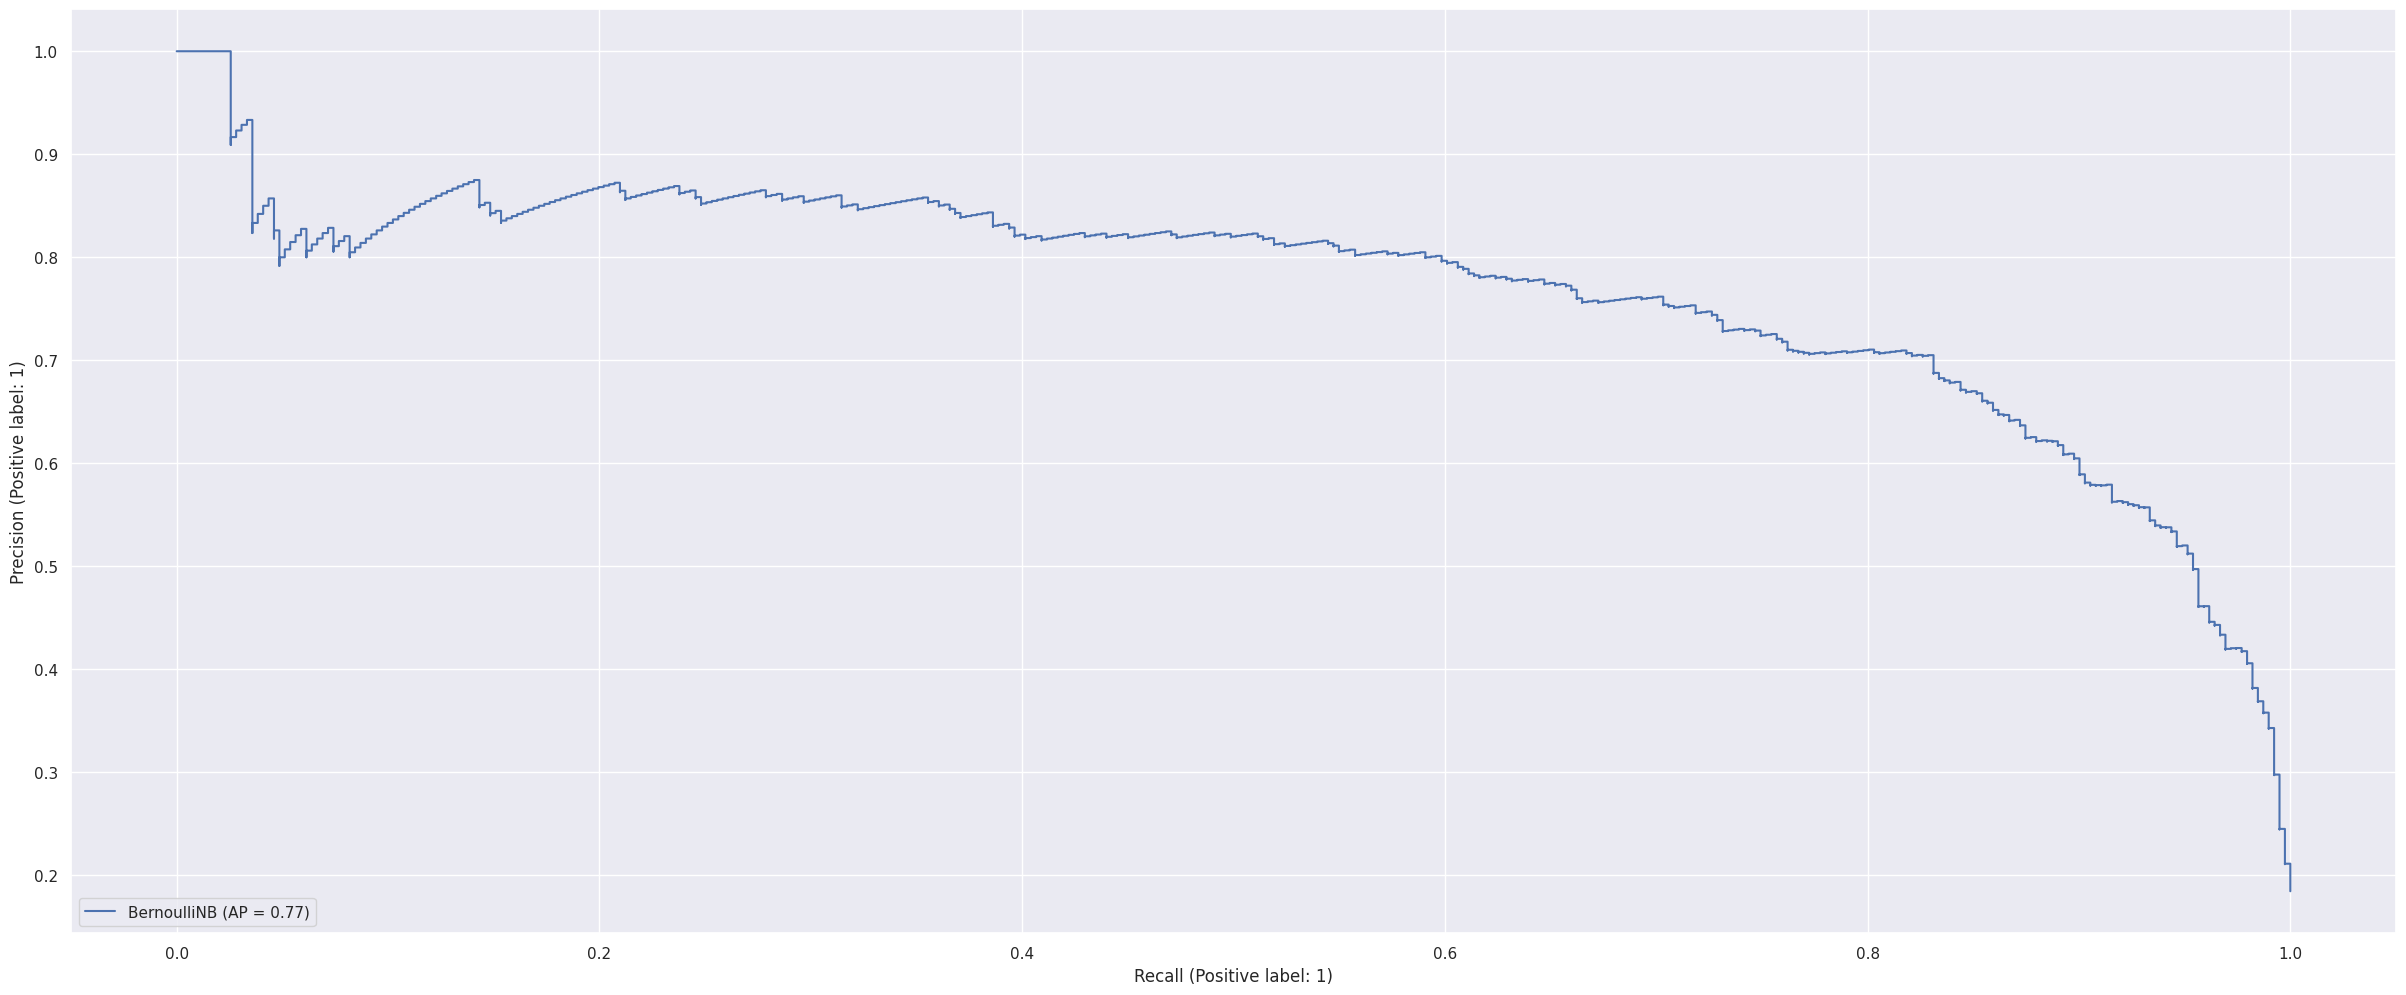

In [116]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test);

In [117]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [118]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [119]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1484  243]
 [  53  338]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.58      0.86      0.70       391

    accuracy                           0.86      2118
   macro avg       0.77      0.86      0.80      2118
weighted avg       0.89      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.64      0.90      0.75      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.89      0.84     19057
weighted avg       0.91      0.89      0.89     19057



In [120]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874902
train_accuracy     0.885612
test_f1            0.720888
train_f1           0.745156
test_recall        0.873676
train_recall       0.904595
test_precision     0.613916
train_precision    0.633506
dtype: float64

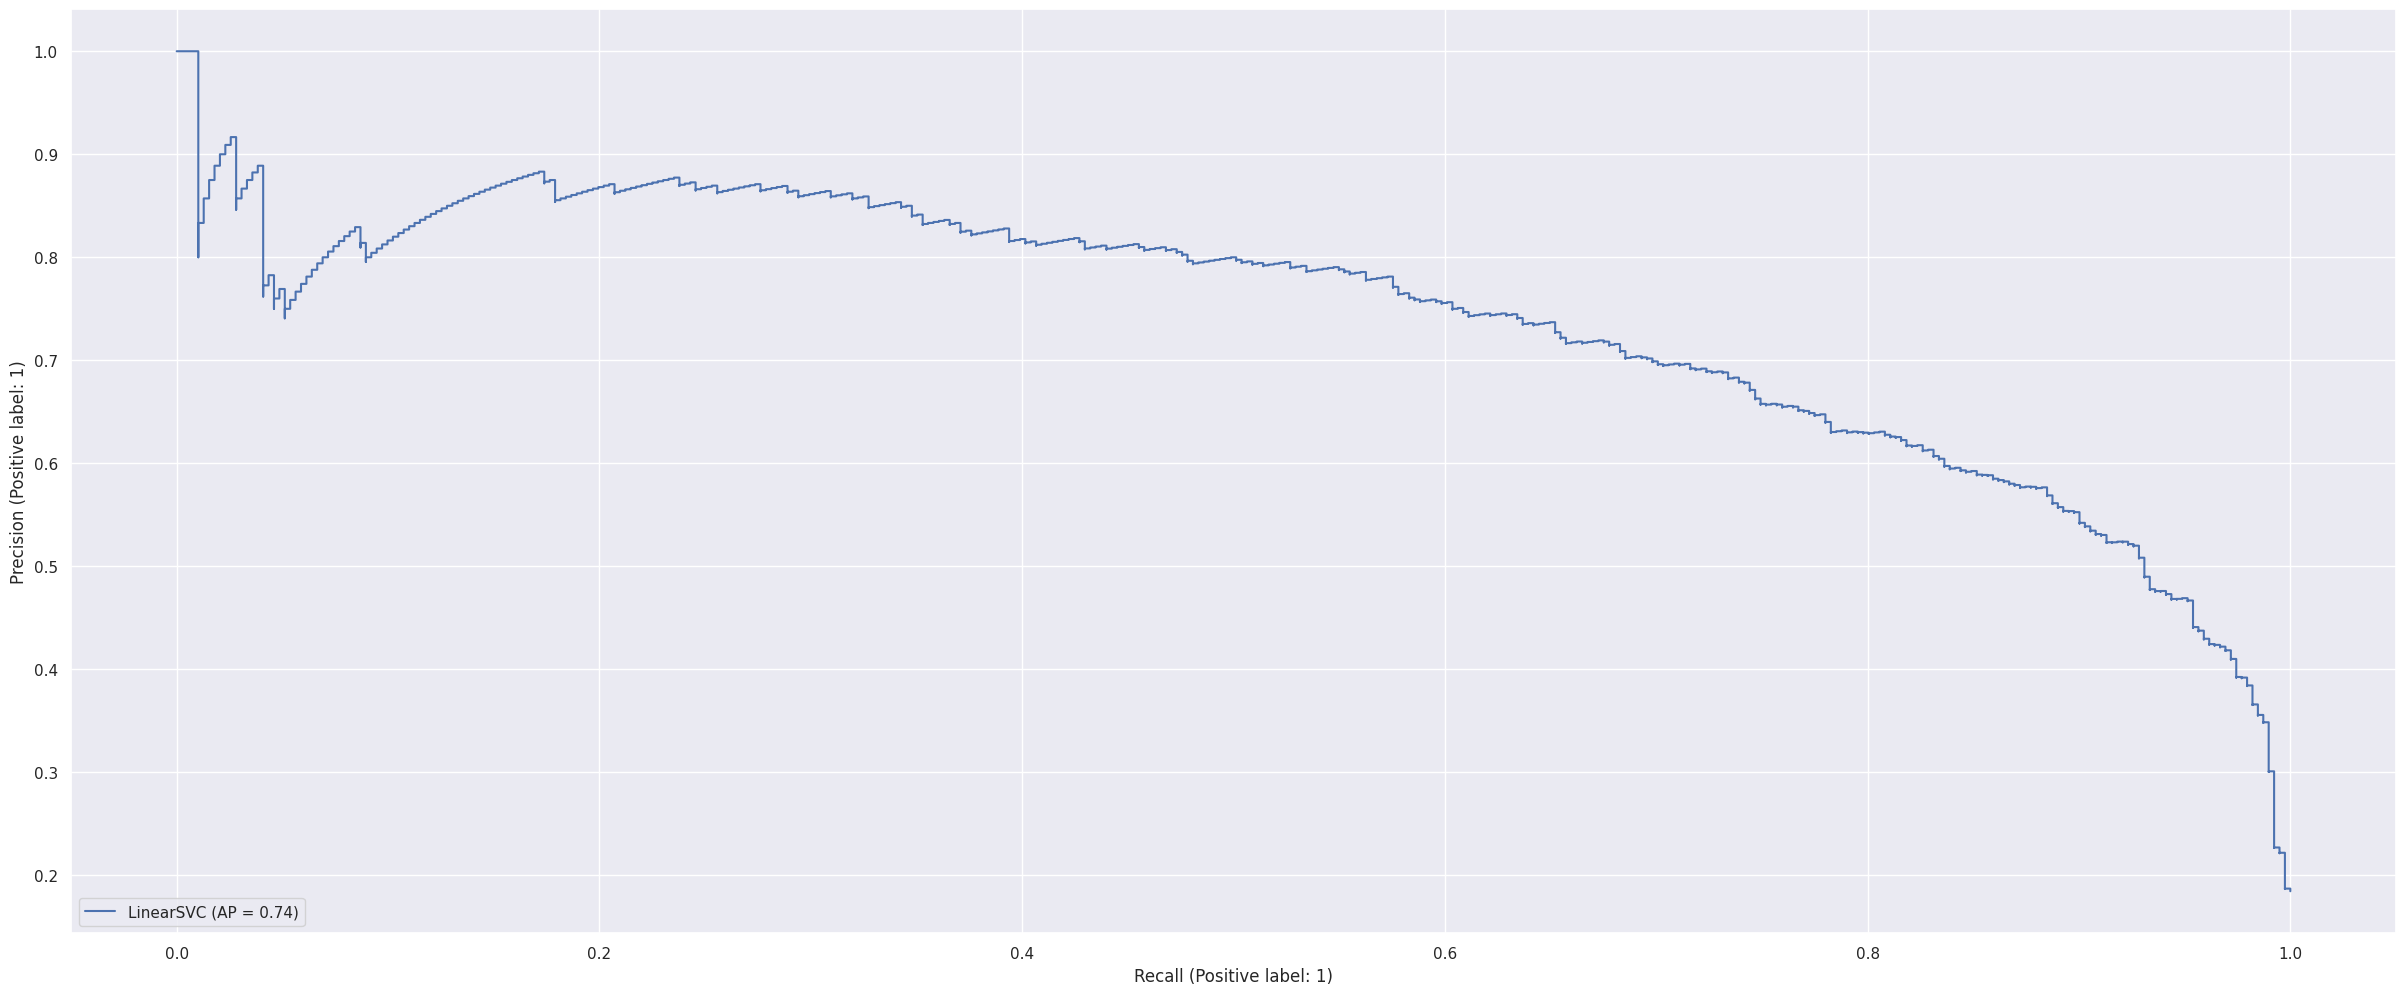

In [121]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [122]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [123]:
svc = LinearSVC(C=0.03,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [124]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1496  231]
 [  40  351]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.60      0.90      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.91      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     15534
           1       0.66      0.93      0.77      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.91      0.85     19057
weighted avg       0.92      0.90      0.91     19057



In [125]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883666
train_accuracy     0.899022
test_f1            0.738228
train_f1           0.773624
test_recall        0.886735
train_recall       0.933327
test_precision     0.632754
train_precision    0.660593
dtype: float64

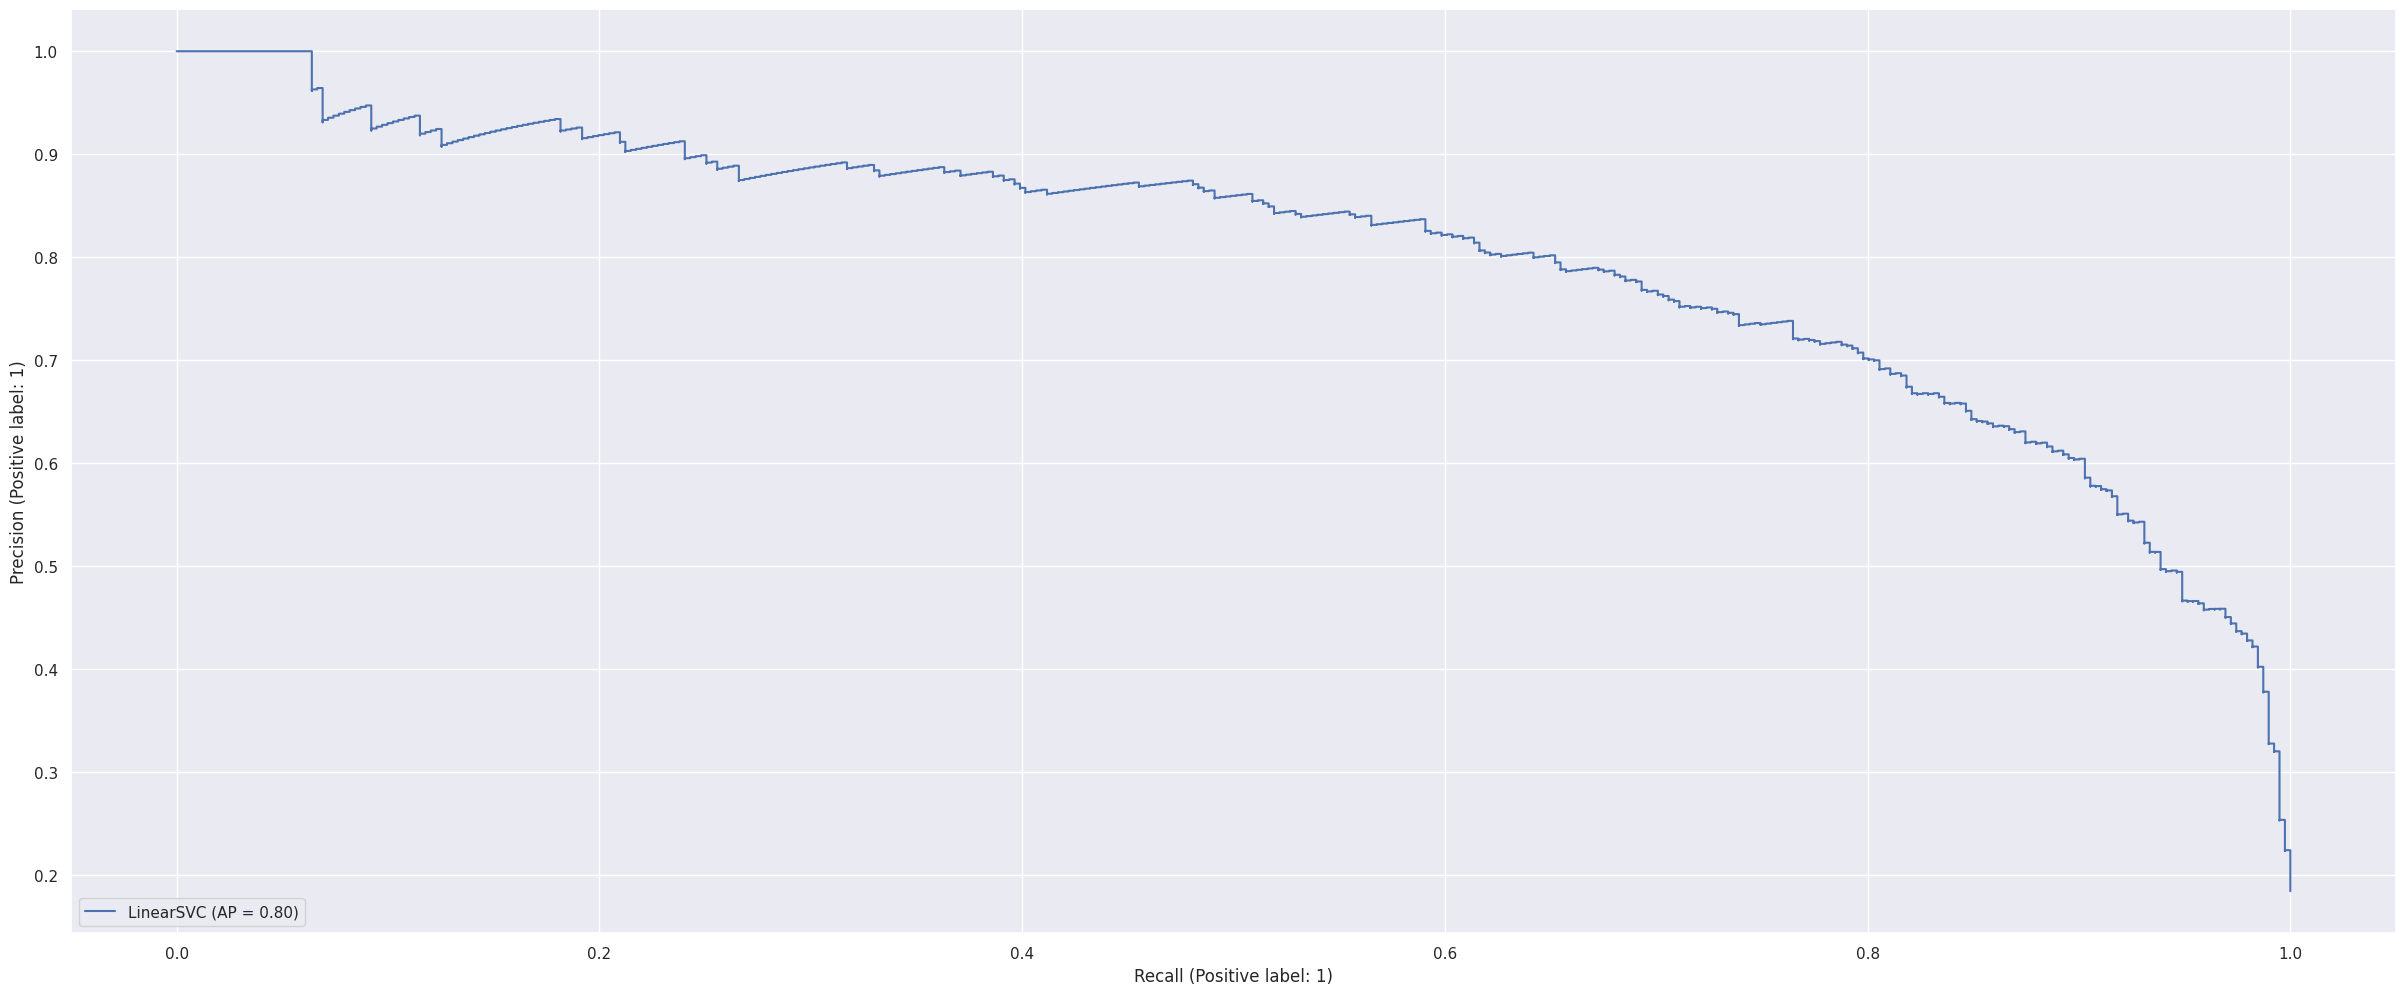

In [126]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [127]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [129]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1458  269]
 [  61  330]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1727
           1       0.55      0.84      0.67       391

    accuracy                           0.84      2118
   macro avg       0.76      0.84      0.78      2118
weighted avg       0.88      0.84      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15534
           1       0.60      0.88      0.71      3523

    accuracy                           0.87     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.87      0.88     19057



In [130]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.853755
train_accuracy     0.870453
test_f1            0.676497
train_f1           0.712555
test_recall        0.826562
train_recall       0.868105
test_precision     0.572841
train_precision    0.604452
dtype: float64

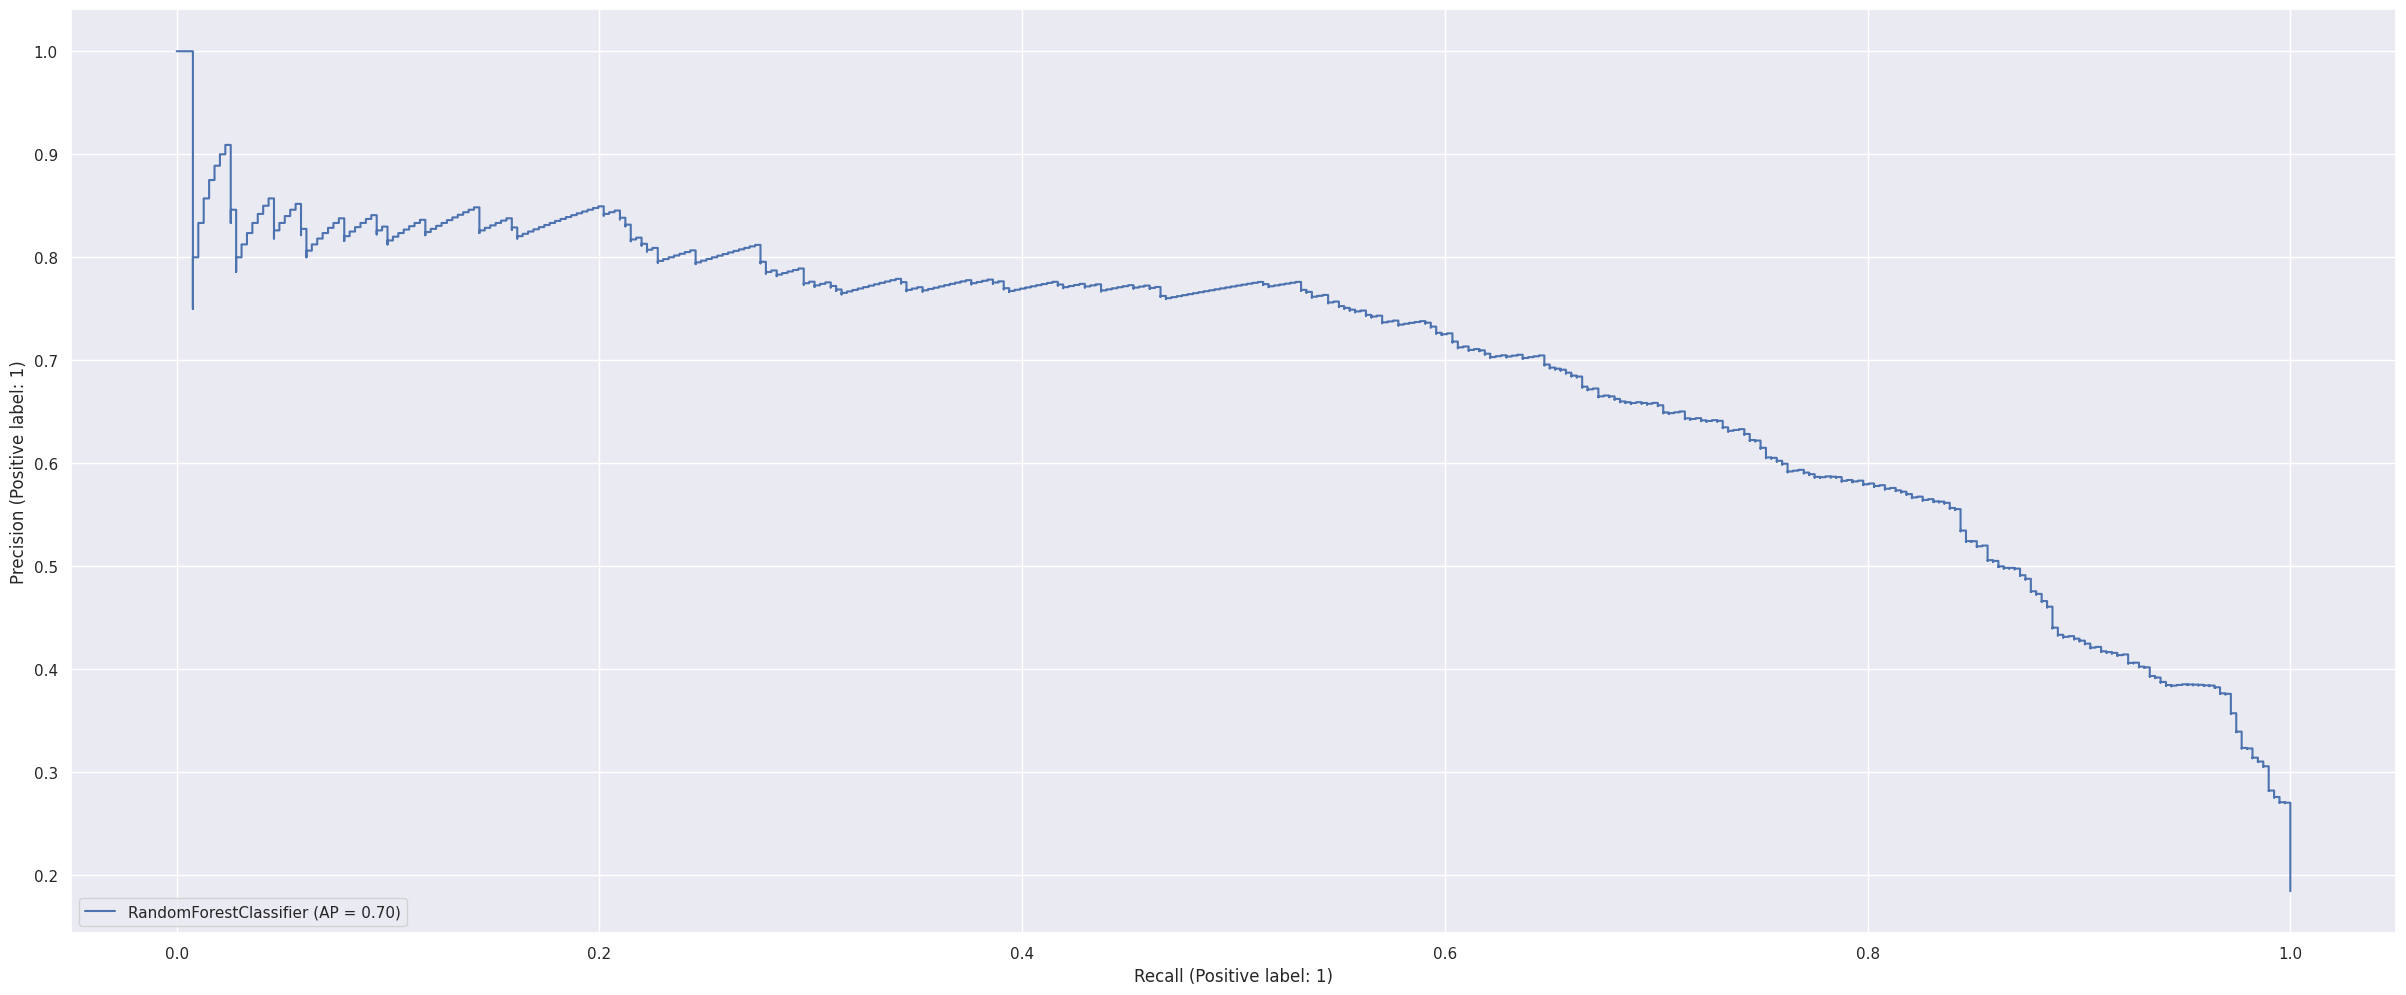

In [131]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test);

In [132]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [133]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [134]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1433  294]
 [  64  327]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1727
           1       0.53      0.84      0.65       391

    accuracy                           0.83      2118
   macro avg       0.74      0.83      0.77      2118
weighted avg       0.88      0.83      0.84      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15534
           1       0.58      0.89      0.70      3523

    accuracy                           0.86     19057
   macro avg       0.78      0.87      0.81     19057
weighted avg       0.90      0.86      0.87     19057



In [135]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842001
train_accuracy     0.866249
test_f1            0.658908
train_f1           0.709904
test_recall        0.824863
train_recall       0.884883
test_precision     0.548820
train_precision    0.592852
dtype: float64

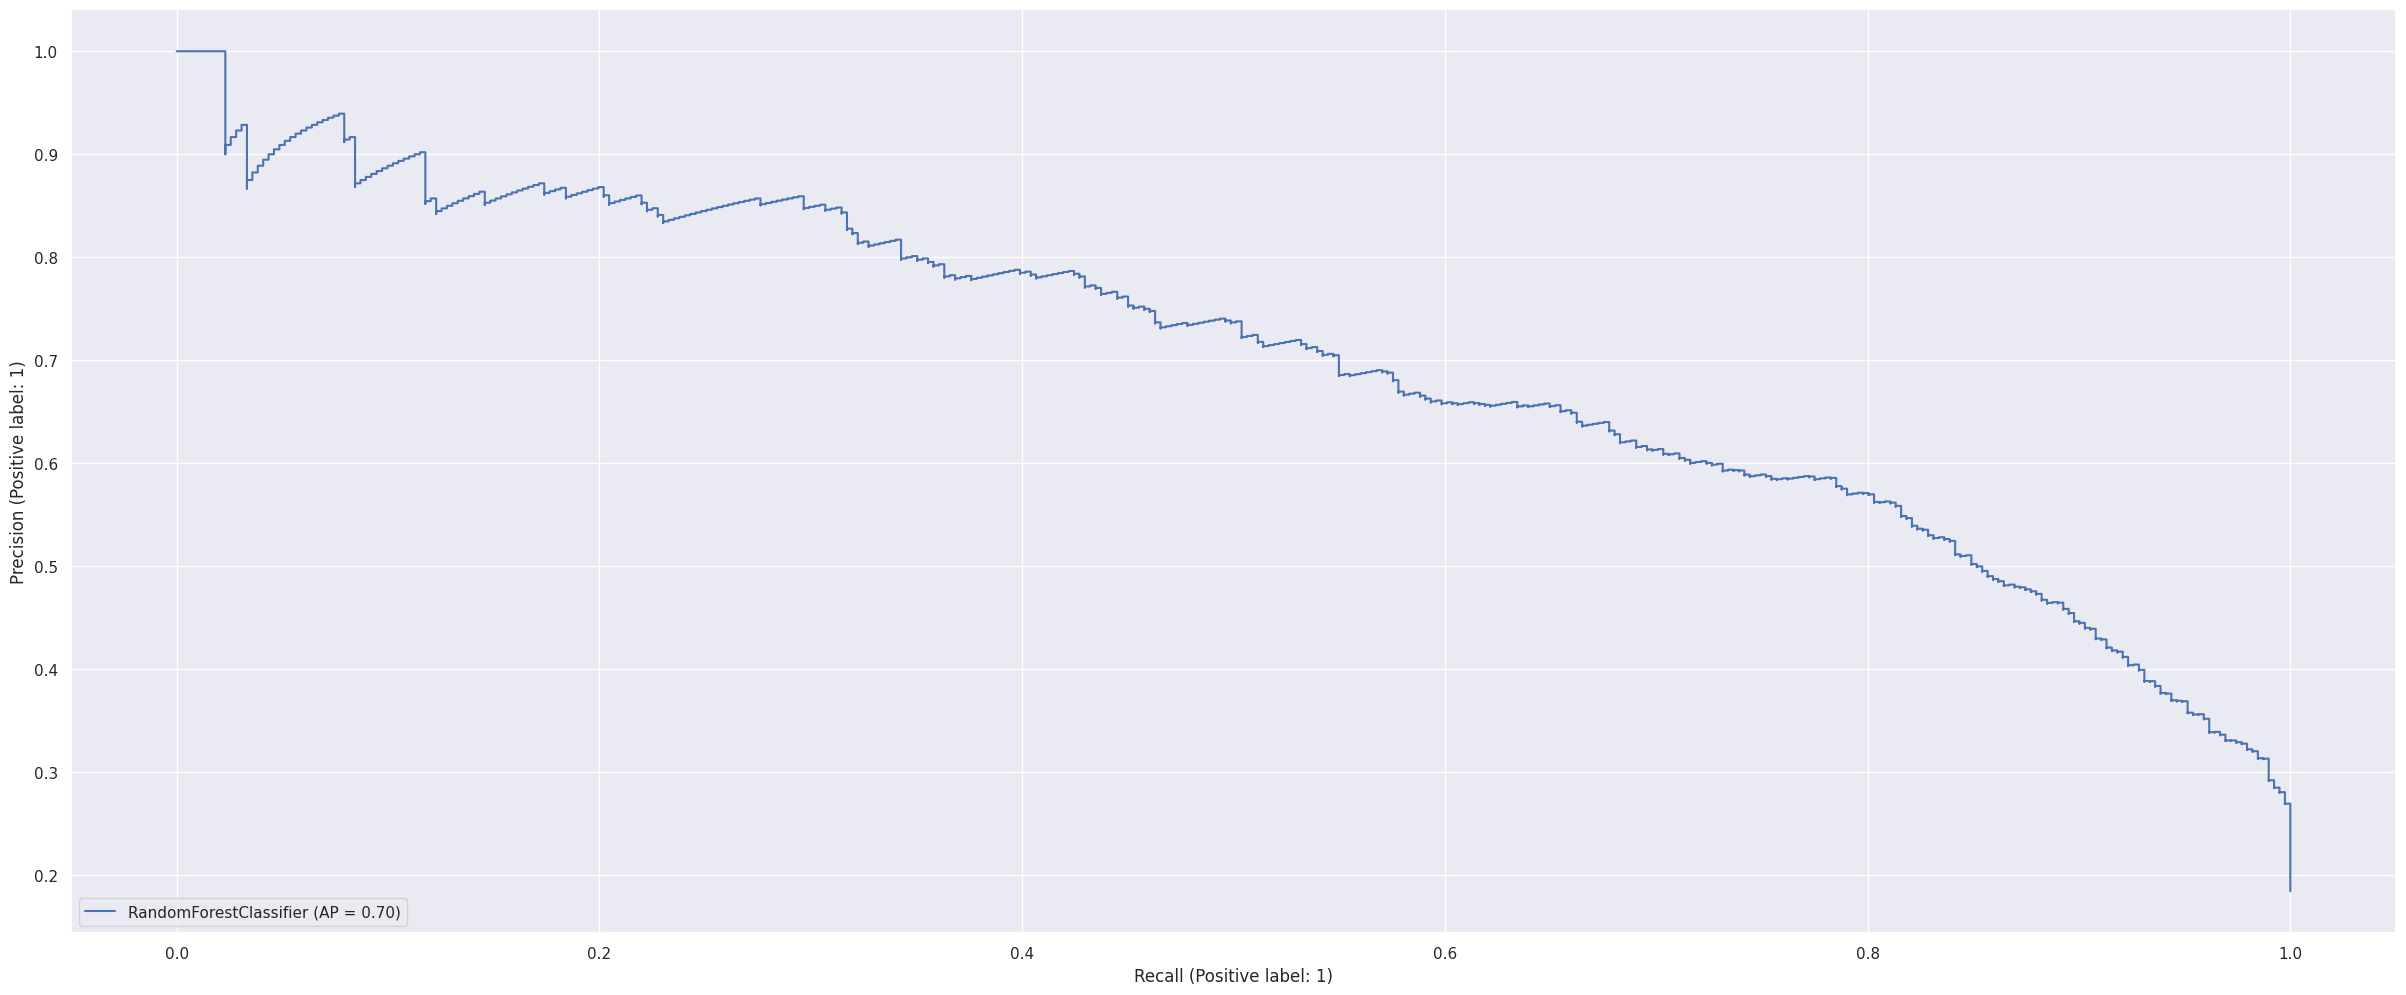

In [136]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test);

In [137]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [138]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [139]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1638   89]
 [ 168  223]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1727
           1       0.71      0.57      0.63       391

    accuracy                           0.88      2118
   macro avg       0.81      0.76      0.78      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     15534
           1       0.77      0.61      0.68      3523

    accuracy                           0.89     19057
   macro avg       0.84      0.78      0.81     19057
weighted avg       0.89      0.89      0.89     19057



In [140]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.889175
train_accuracy     0.894008
test_f1            0.663536
train_f1           0.678427
test_recall        0.591257
train_recall       0.604820
test_precision     0.756811
train_precision    0.772458
dtype: float64

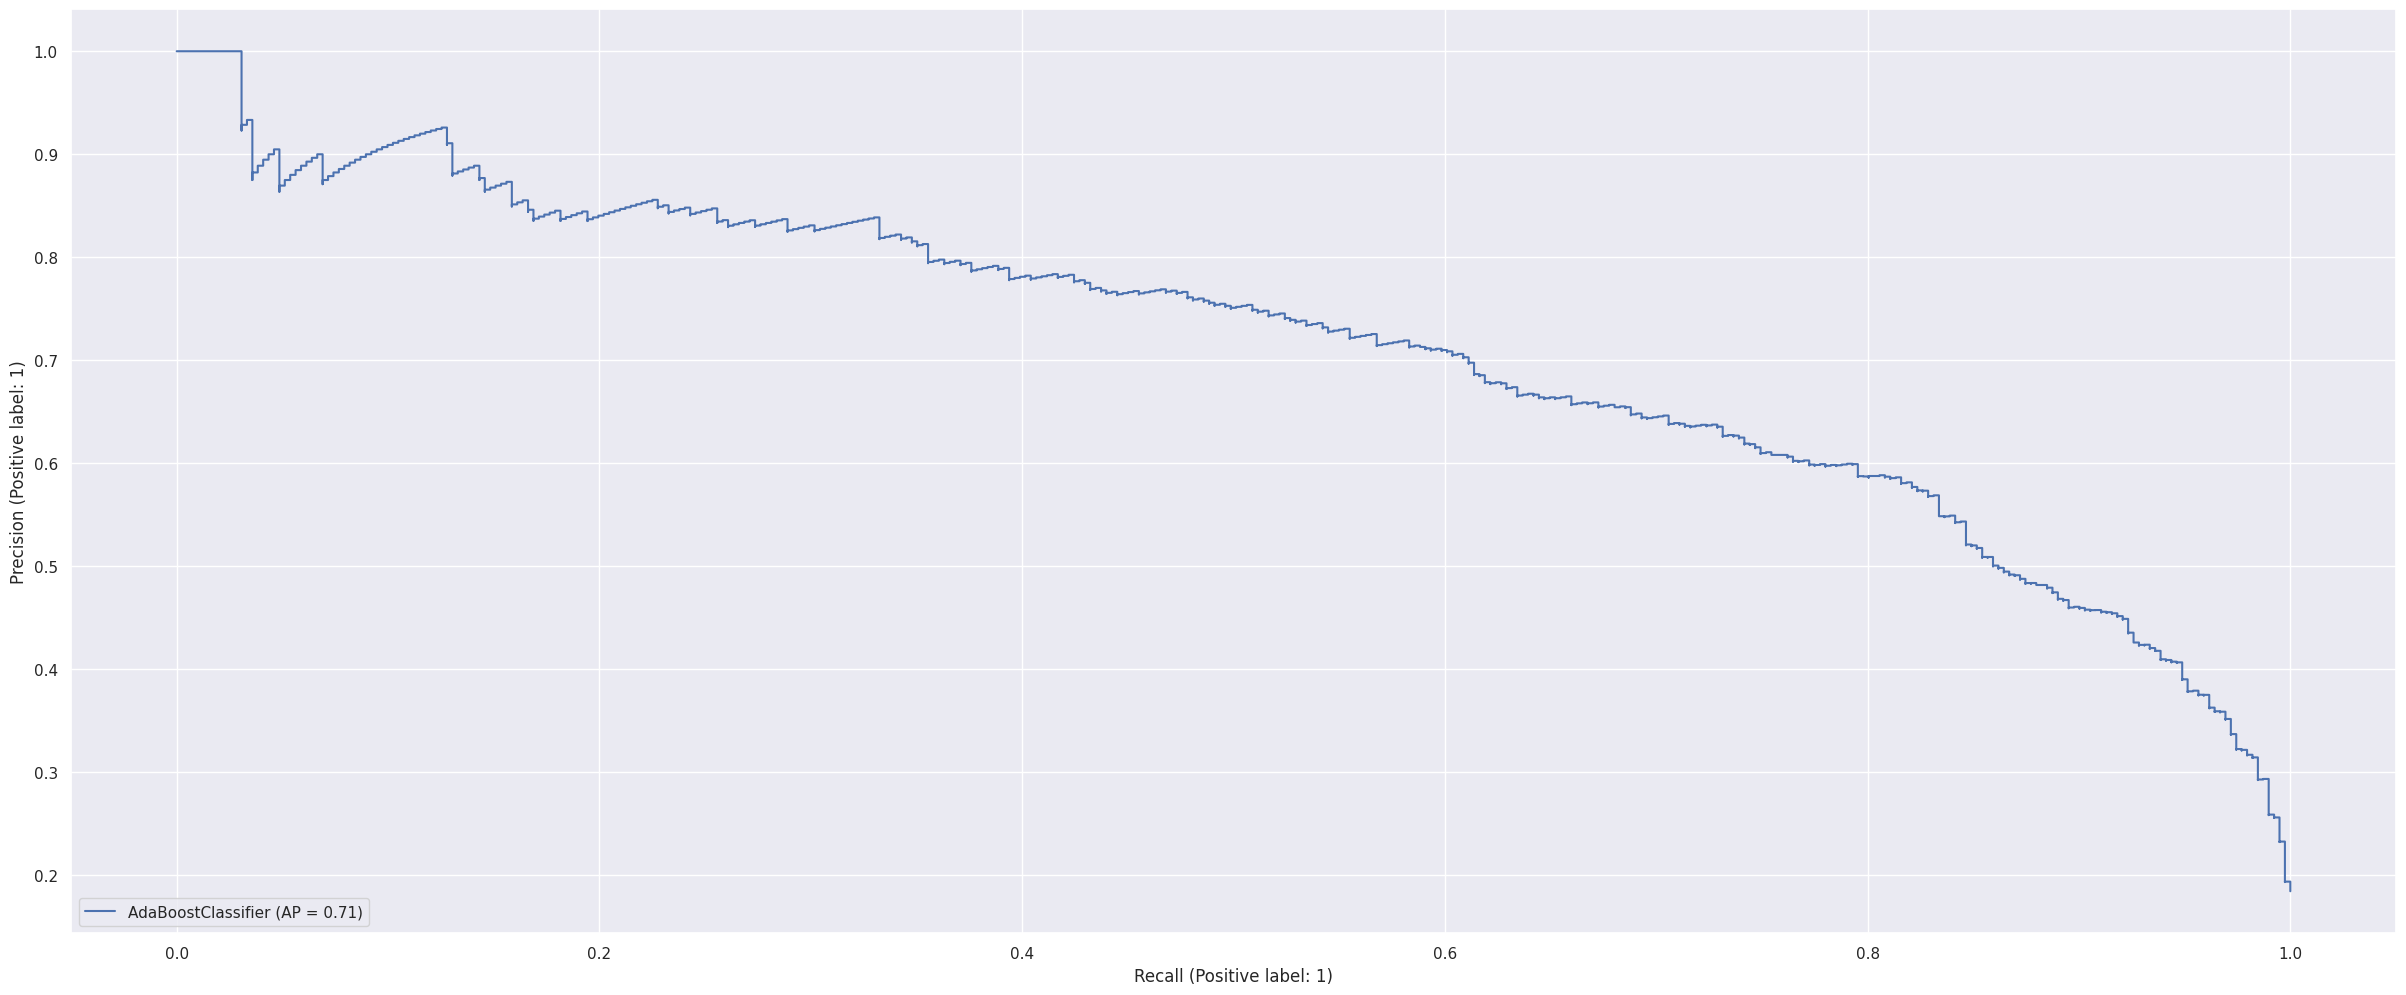

In [141]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test);

In [142]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [143]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [144]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1663   64]
 [ 192  199]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1727
           1       0.76      0.51      0.61       391

    accuracy                           0.88      2118
   macro avg       0.83      0.74      0.77      2118
weighted avg       0.87      0.88      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15534
           1       0.80      0.54      0.65      3523

    accuracy                           0.89     19057
   macro avg       0.85      0.75      0.79     19057
weighted avg       0.88      0.89      0.88     19057



In [145]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.886237
train_accuracy     0.894119
test_f1            0.632009
train_f1           0.658291
test_recall        0.529100
train_recall       0.551676
test_precision     0.786290
train_precision    0.816012
dtype: float64

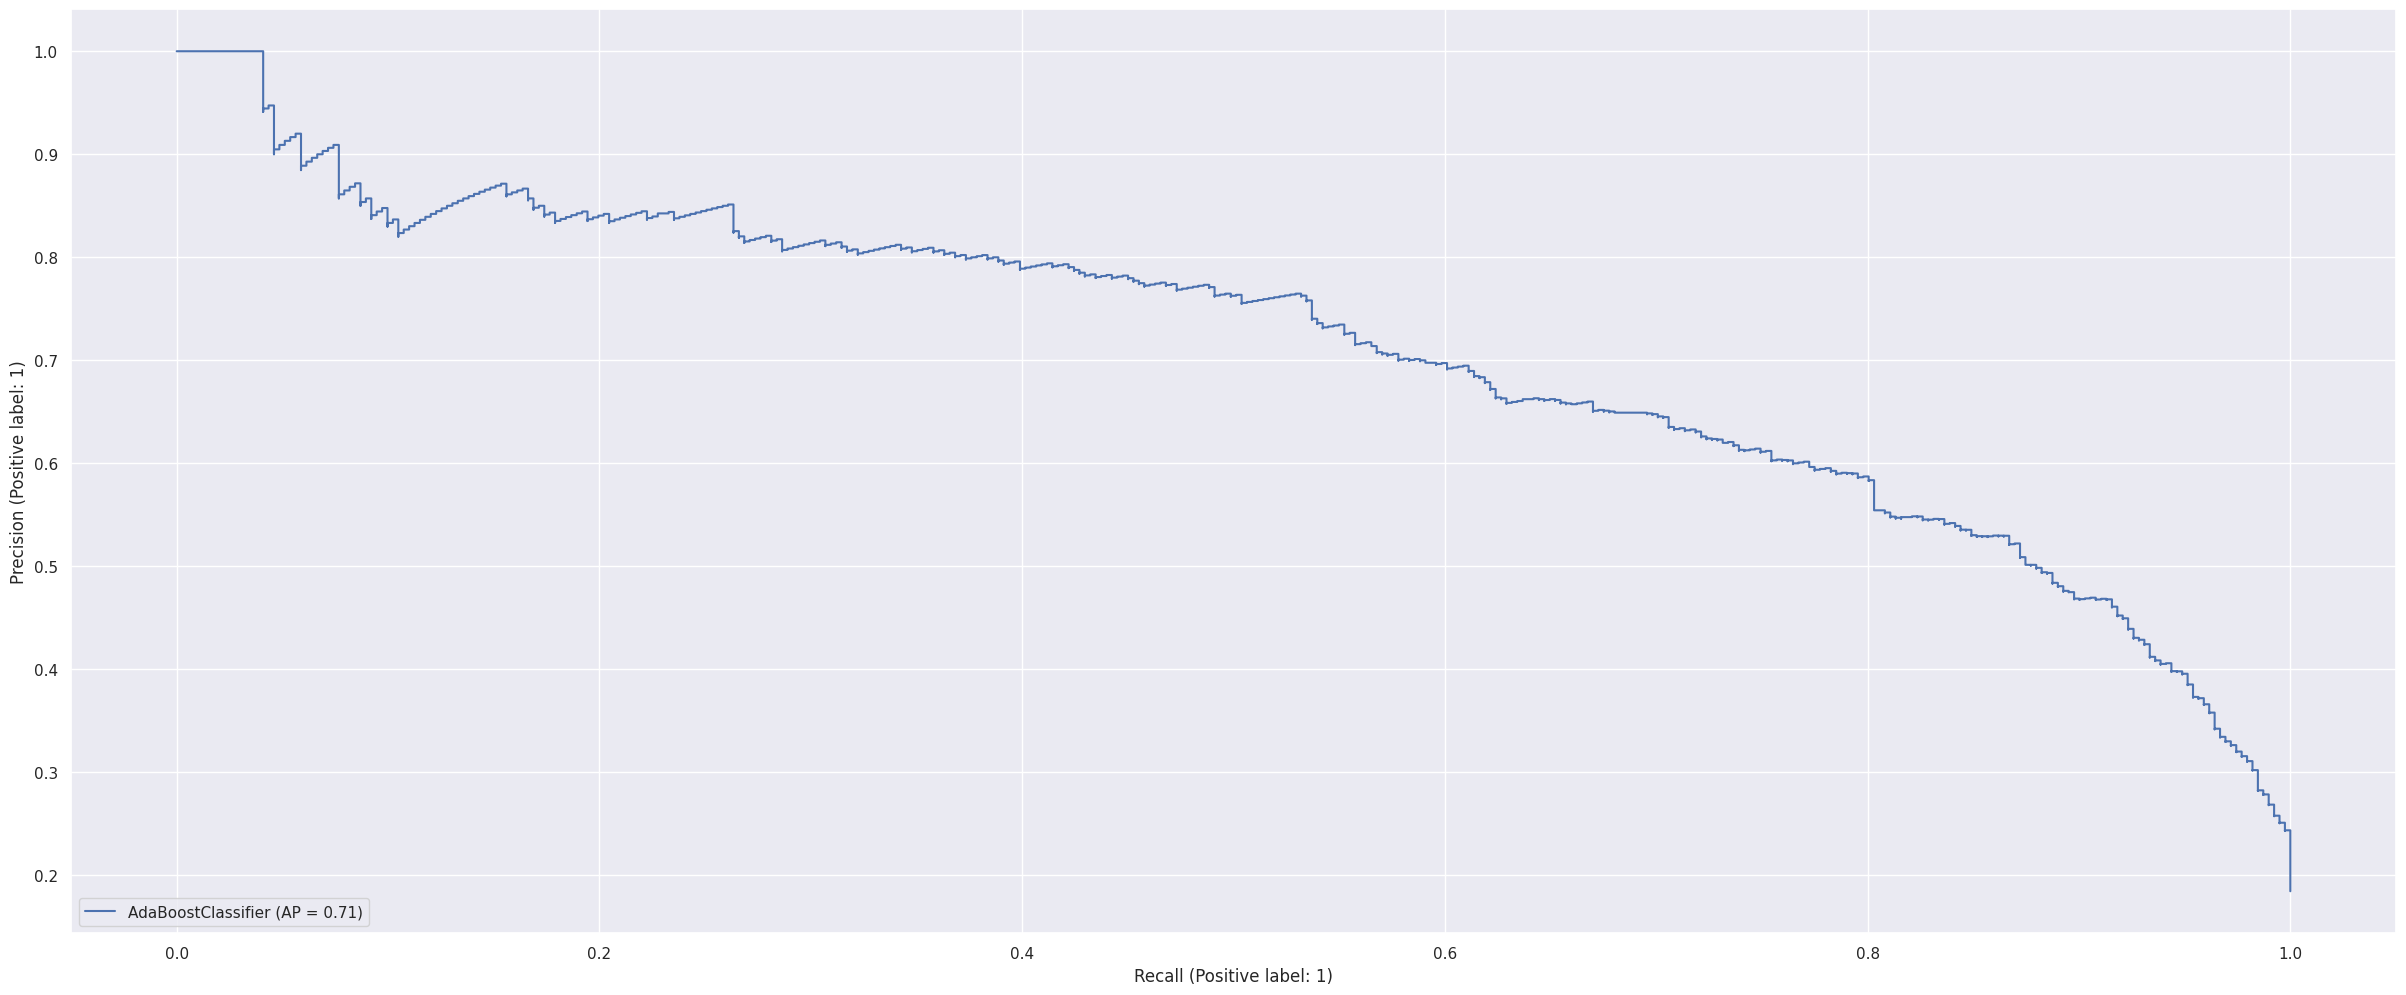

In [146]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_tf_idf,
                                      y_test);

In [147]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [149]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

### Tokenization

In [150]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [151]:
tokenizer.fit_on_texts(X)

### Creating word index

In [152]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [153]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [154]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [155]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [156]:
num_tokens.mean()

60.2330106257379

In [157]:
num_tokens.max()

116

In [158]:
num_tokens.argmax()


15213

In [159]:
X[15213]


"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [160]:
max_tokens = 116

In [161]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [162]:
X_pad = pad_sequences(X_num_tokens,
                      maxlen = max_tokens)

In [163]:
X_pad.shape

(21175, 116)

### Train Set Split

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [166]:
model = Sequential()

In [167]:
embedding_size = 50

In [168]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [169]:
optimizer = Adam(learning_rate=0.001)

In [170]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [171]:
model.summary()

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [172]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [173]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [174]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
149/149 [==============================] - 31s 155ms/step - loss: 0.4690 - recall: 0.8538 - val_loss: 0.3419 - val_recall: 0.9003
Epoch 2/10
149/149 [==============================] - 22s 146ms/step - loss: 0.2508 - recall: 0.9168 - val_loss: 0.2839 - val_recall: 0.8951
Epoch 3/10
149/149 [==============================] - 22s 145ms/step - loss: 0.1947 - recall: 0.9483 - val_loss: 0.3219 - val_recall: 0.9003
Epoch 3: early stopping


### Model evaluation

In [175]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.469048  0.853818  0.341905    0.900256
1  0.250790  0.916832  0.283897    0.895141
2  0.194682  0.948339  0.321934    0.900256

<Axes: >

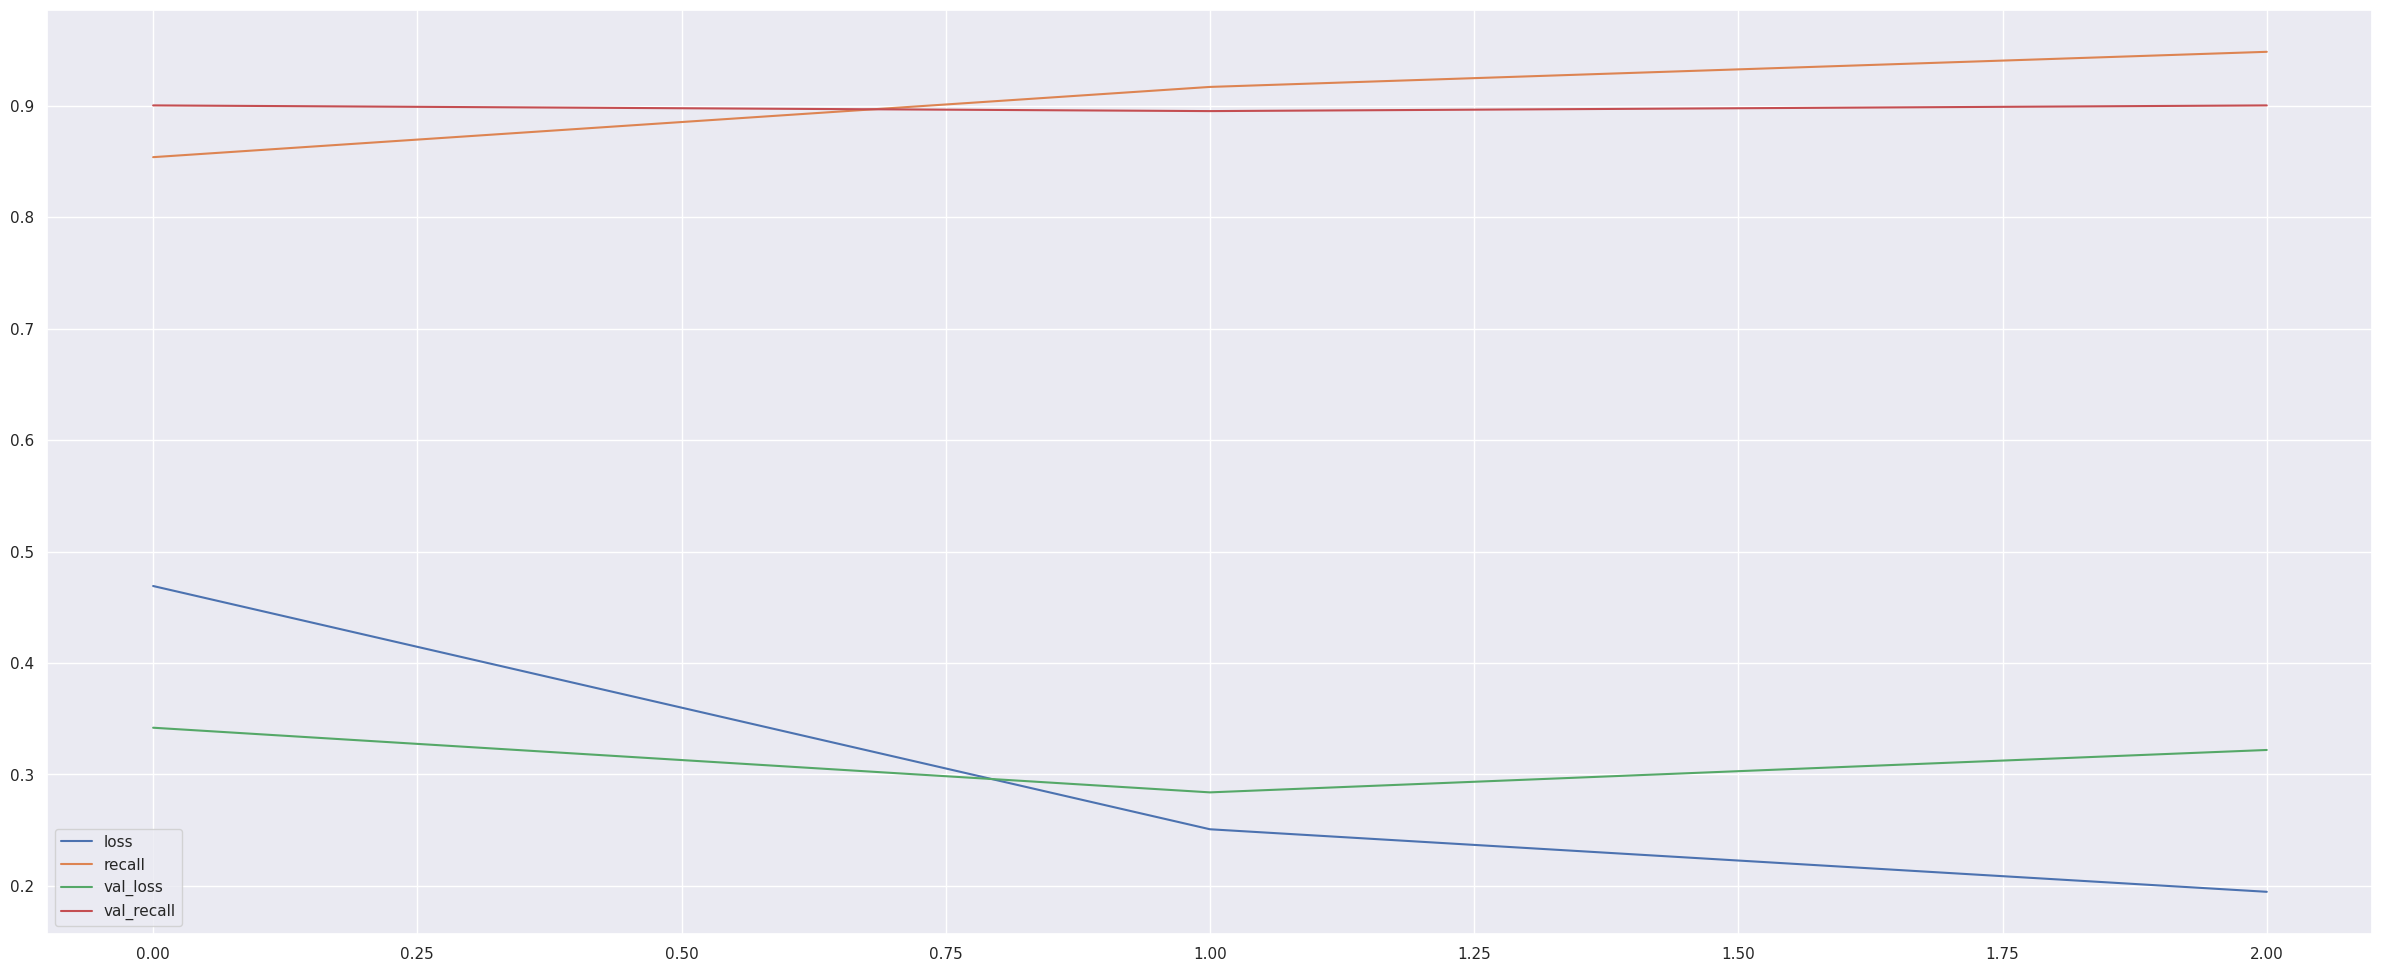

In [176]:
model_loss.plot()

In [177]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 2s 24ms/step
[[1449  278]
 [  39  352]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1727
           1       0.56      0.90      0.69       391

    accuracy                           0.85      2118
   macro avg       0.77      0.87      0.80      2118
weighted avg       0.90      0.85      0.86      2118



In [178]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 12s 20ms/step
[[13451  2083]
 [  170  3353]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     15534
           1       0.62      0.95      0.75      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.91      0.84     19057
weighted avg       0.92      0.88      0.89     19057



67/67 [==============================] - 1s 20ms/step


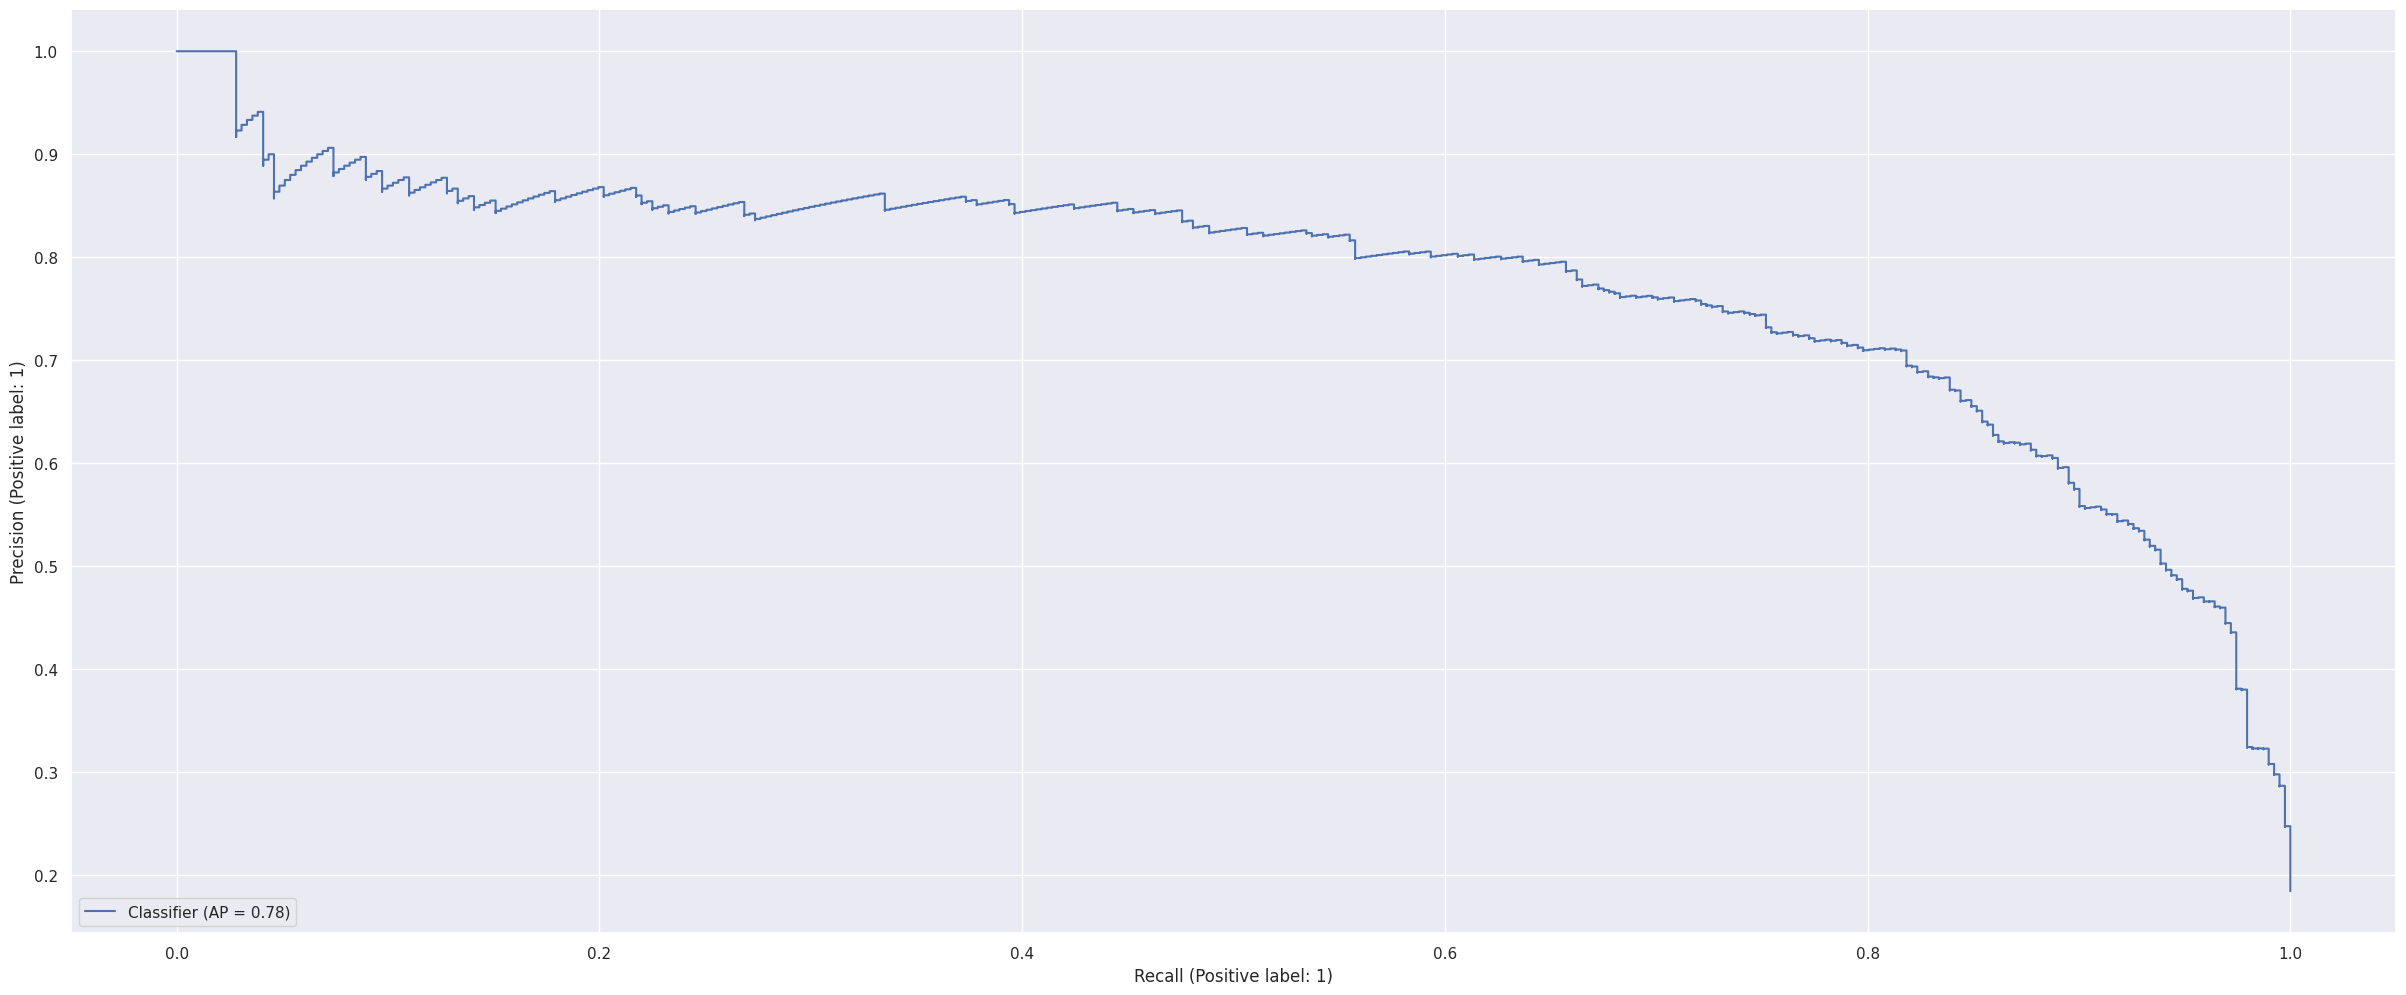

In [179]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [180]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7784201947614563

In [181]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [182]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00


### Tokenization

In [183]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "I was very happy to snag this dress at such a great price! it's very easy to slip on an

In [184]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [185]:
np.array(num_of_sent_tokens).mean()

76.31556080283353

In [186]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [187]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [188]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [189]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [190]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2001, ...,    0,    0,    0],
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [191]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [192]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [193]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [194]:
Xids_train

array([[ 101, 2025, 2469, ...,    0,    0,    0],
       [ 101, 3504, 2428, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 1996, 6302, ...,    0,    0,    0]])

In [195]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [196]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [197]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

*   List item
*   List item



In [198]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [199]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [200]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [201]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [202]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [203]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

*italicized text*## Batch Size

In [204]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [205]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00


In [206]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [207]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


### Creating Model with TPU

In [208]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [209]:
from tensorflow.keras import layers


In [210]:
pip install keras==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.1 requires keras<2.15,>=2.14.0, but you have keras 2.6.0 which is incompatible.


In [211]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [212]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [213]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
596/596 [==============================] - 241s 197ms/step - loss: 0.5828 - recall: 0.8376 - val_loss: 0.5588 - val_recall: 0.9028
Epoch 2/2
596/596 [==============================] - 63s 105ms/step - loss: 0.4692 - recall: 0.9060 - val_loss: 0.3925 - val_recall: 0.8670


## Model evaluation

In [214]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.582821  0.837638  0.558798    0.902813
1  0.469173  0.906046  0.392520    0.867008

<Axes: >

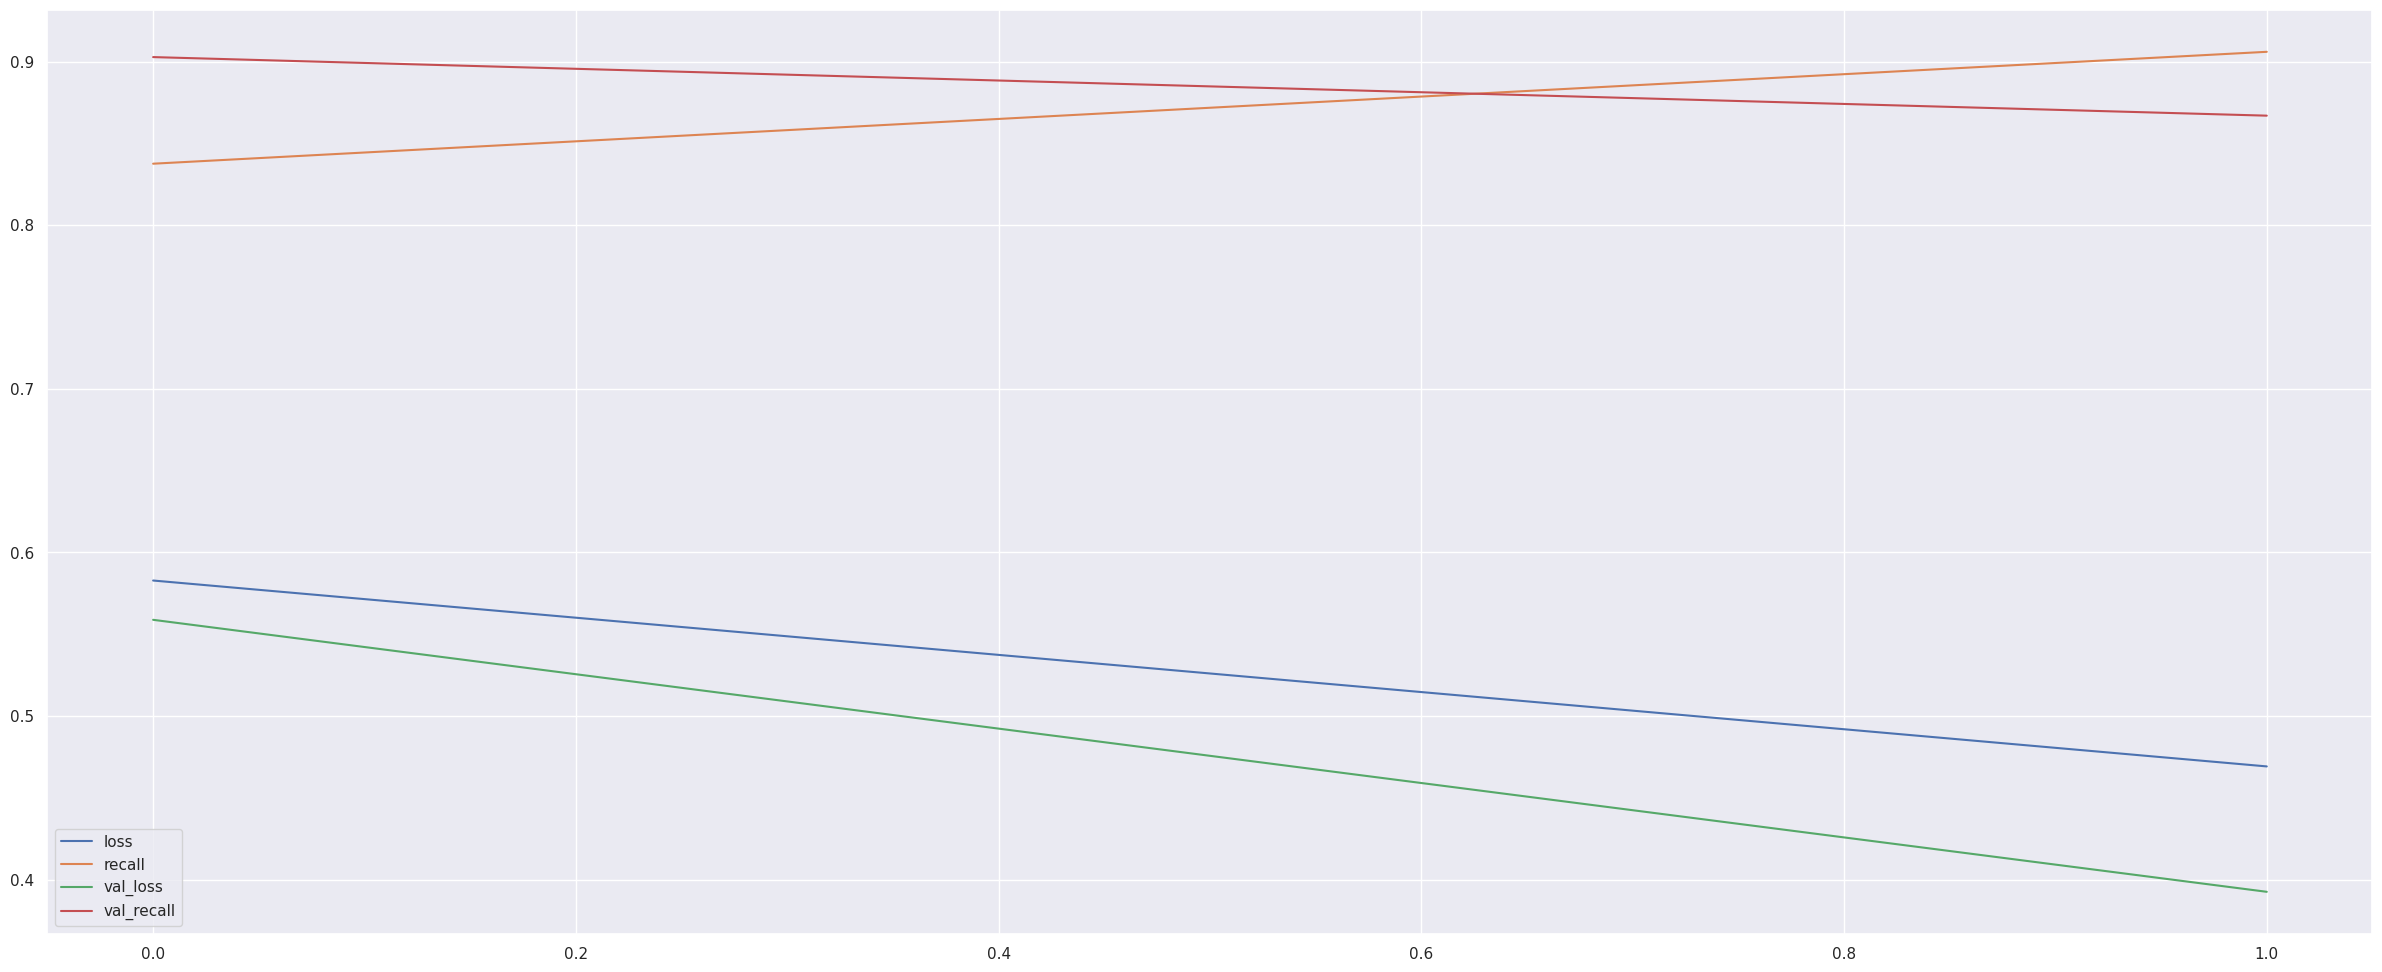

In [215]:
model_loss.plot()

In [216]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

67/67 [==============================] - 17s 161ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1727
           1       0.81      0.87      0.84       391

    accuracy                           0.94      2118
   macro avg       0.89      0.91      0.90      2118
weighted avg       0.94      0.94      0.94      2118



In [217]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

596/596 [==============================] - 22s 35ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     15534
           1       0.87      0.91      0.89      3523

    accuracy                           0.96     19057
   macro avg       0.93      0.94      0.93     19057
weighted avg       0.96      0.96      0.96     19057



67/67 [==============================] - 3s 29ms/step


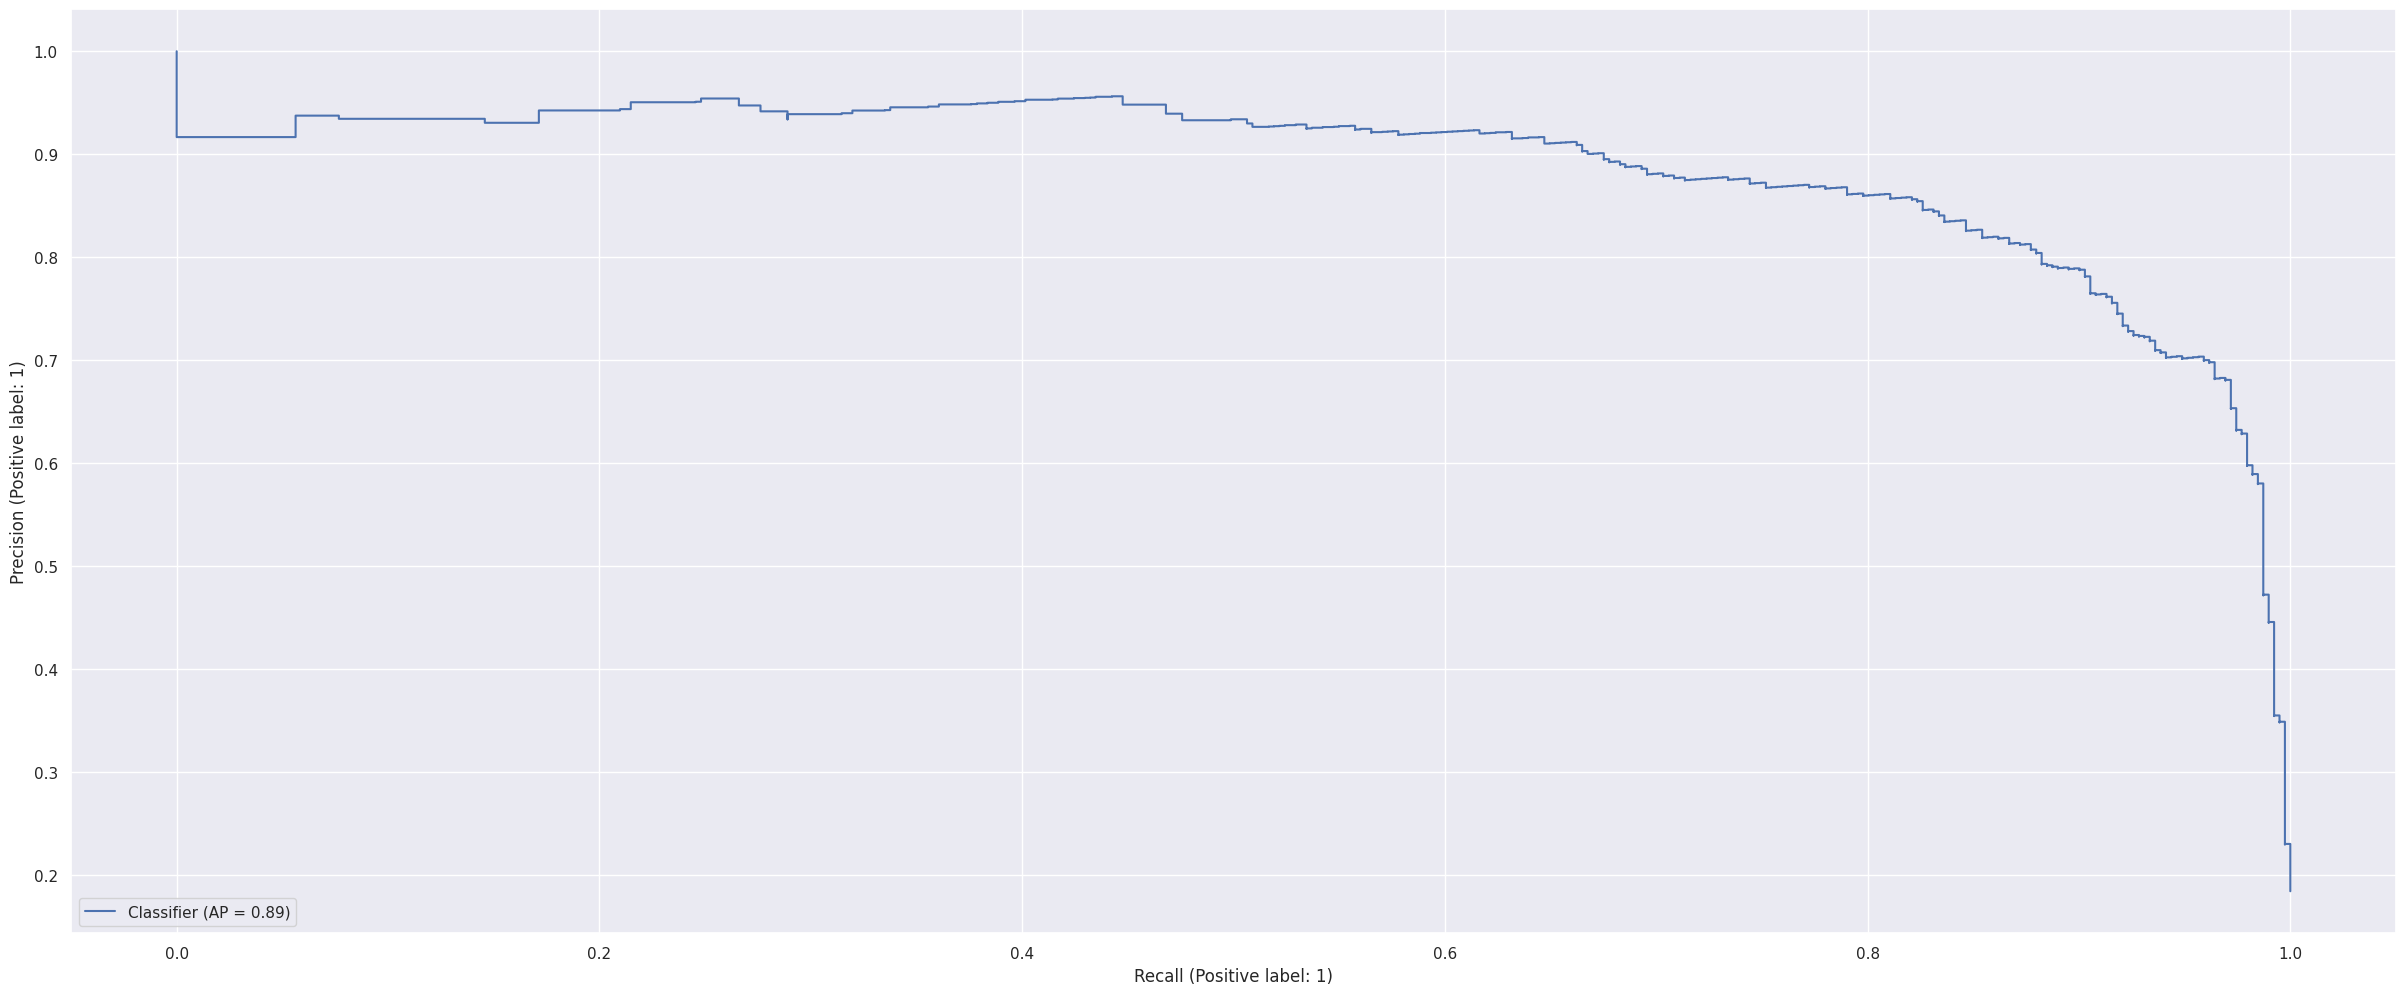

In [218]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [219]:
average_precision_score(y_test2, y_pred_proba)

0.8895588182329695

In [220]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

## BERT Model with Weighted

In [221]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [222]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [223]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [224]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [225]:
weights = {0:0.18, 1:0.81}

In [226]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
596/596 [==============================] - 205s 204ms/step - loss: 0.1283 - recall_1: 0.8884 - val_loss: 0.4314 - val_recall_1: 0.9642
Epoch 2/2
596/596 [==============================] - 64s 108ms/step - loss: 0.0942 - recall_1: 0.9517 - val_loss: 0.3330 - val_recall_1: 0.9335


In [227]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

67/67 [==============================] - 21s 164ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1727
           1       0.76      0.93      0.84       391

    accuracy                           0.93      2118
   macro avg       0.87      0.93      0.90      2118
weighted avg       0.94      0.93      0.94      2118



In [228]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred))

596/596 [==============================] - 23s 35ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     15534
           1       0.83      0.96      0.89      3523

    accuracy                           0.96     19057
   macro avg       0.91      0.96      0.93     19057
weighted avg       0.96      0.96      0.96     19057



In [229]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

67/67 [==============================] - 4s 30ms/step


0.9078309646439814

In [230]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

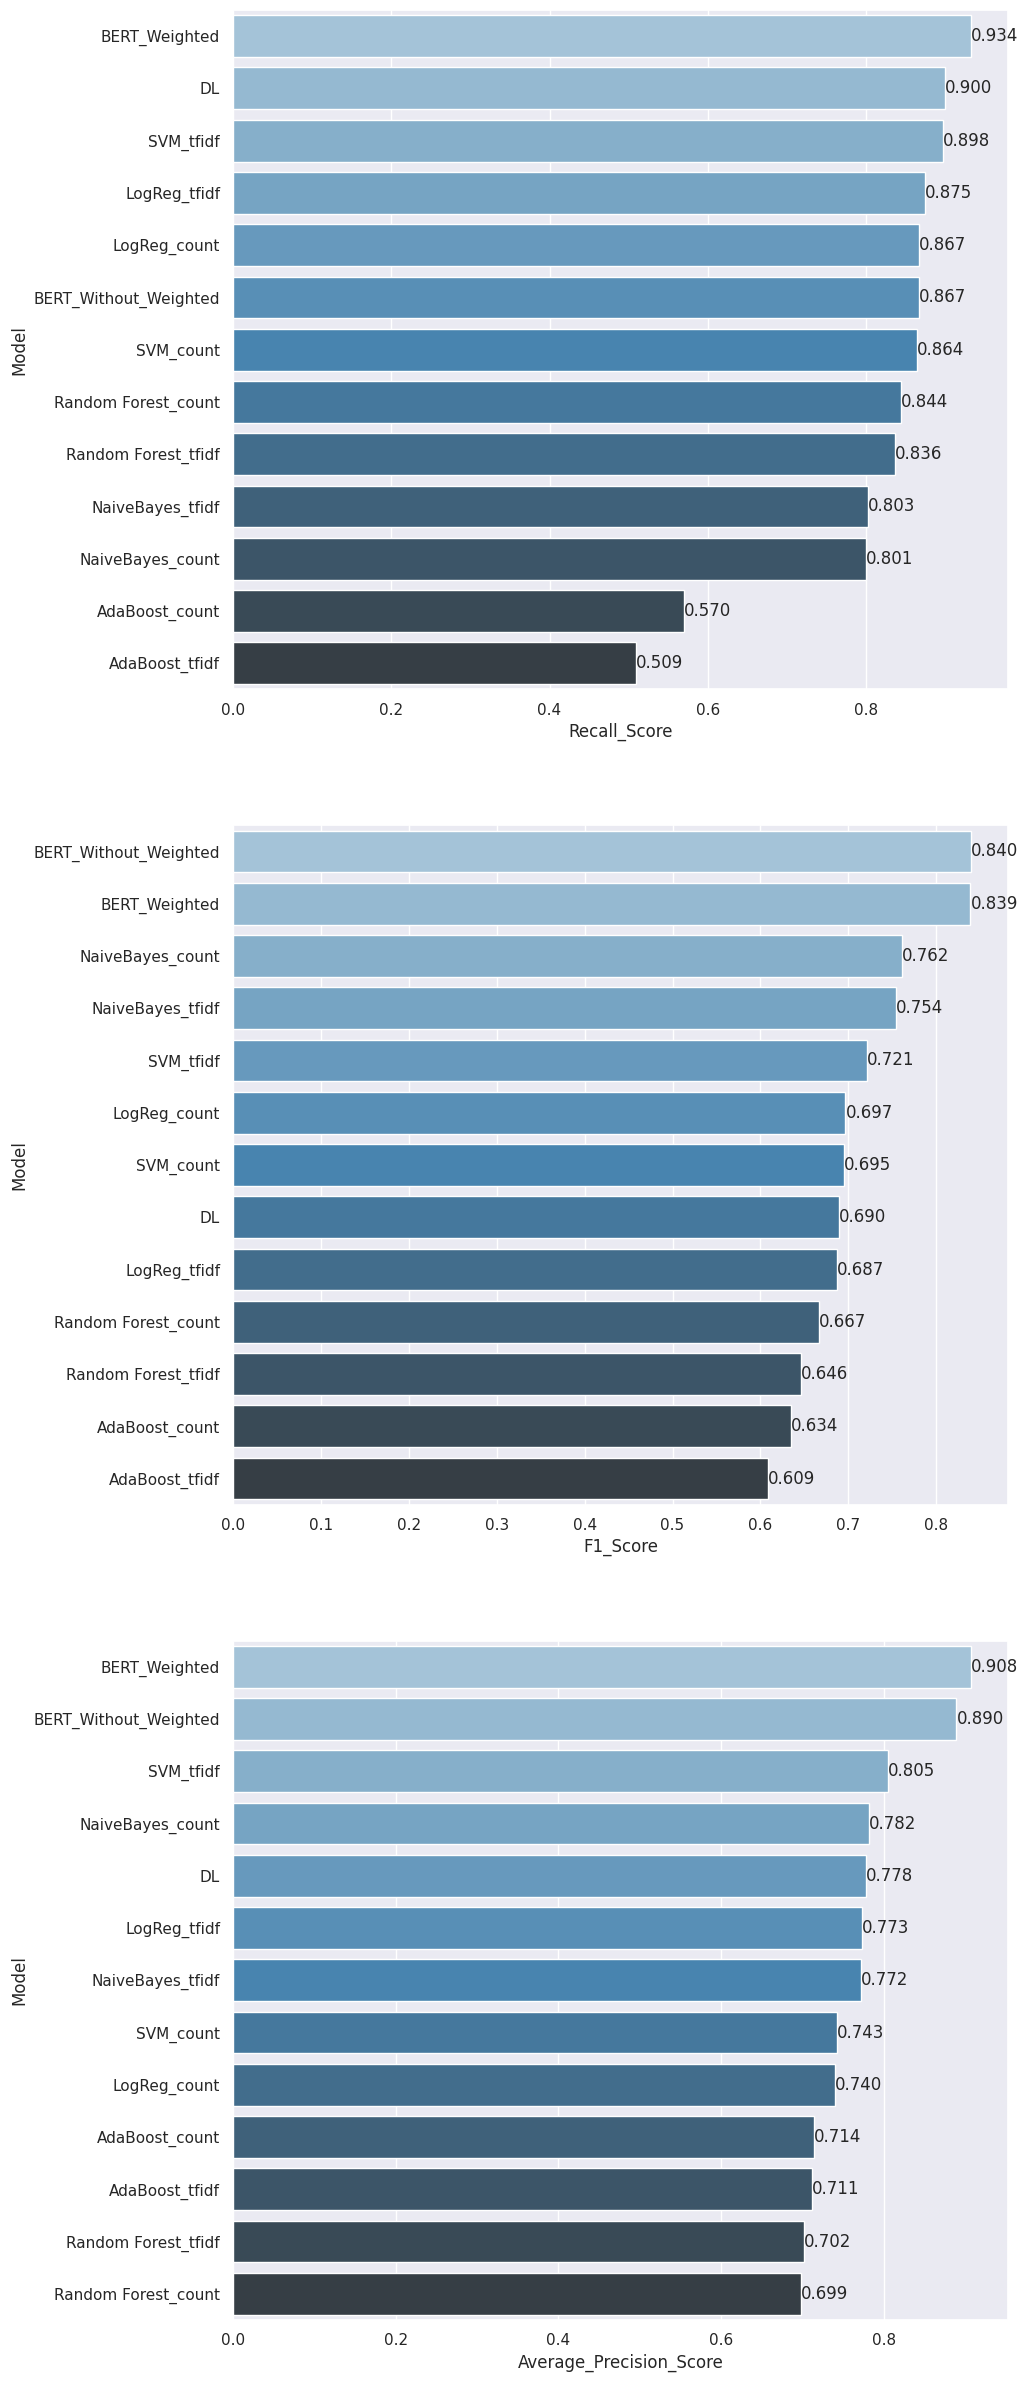

In [231]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## BERT Large Uncased

In [232]:
#from transformers import AutoTokenizer
#tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

#from transformers import TFAutoModel
#model = TFAutoModel.from_pretrained("bert-large-uncased")

### Conclusion

In this project we used sentiment analysis to determine whether a product is recommended or not. We used different machine learning algorithms to get more accurate predictions and a deep learning algorithm to compare them with machine learning models.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___